# **Técnicas Avanzadas de Machine Learning**

---
---
<!-- Star Wars: Episodio VII - El despertar de la Fuerza -->

<!-- script html for image -->
<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/4/49/Star_Wars_The_Force_Awakens.jpg' width="650" height="300" />

</figure></center>

Fuente de la imagen: [Wikipedia](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_VII_-_El_despertar_de_la_Fuerza)


# Índice

> [1. - Procesamiento del lenguaje natural con Deep Learning](#scrollTo=SB6Jj0IL6lxs&line=1&uniqifier=1)
<br>
>>
>> [1.1. Preliminares](#scrollTo=eG465NaCLtBG)
>>
>> [1.2. NLP básico con NLTK](#scrollTo=DmtzviOM7IVf)
>>
>>> [1.2.1 - Etiquetado gramatical o PoS-Tag (*Part of Speech Tagging*)](#scrollTo=nCCzEQ13rBtU)
>>>
>>> [1.2.2 - Extracción de Entidades o NER (*Named-Entity Recognition*)](#scrollTo=frgphRAYpoPe)
>>>
>>> [1.2.3 - Extracción de árboles sintácticos](#scrollTo=XxLp31JhvhwS)
>>>
>>> [1.2.4 - Clasificadores de sentimiento basados en SVM](#scrollTo=9AB-O05OxHcO)
>>>
>> [1.3. Word embeddings con Gensim - Conceptos básicos y clasificación de texto](#scrollTo=ezLBHQwi7PID)
>>
>>> [1.3.1 - Word2vec](#scrollTo=aKYnP4URY5Fq)
>>>
>>> [1.3.2 - *Transfer Learning* aplicado a *embeddings*](#scrollTo=md-Mw5sZFYGH)
>>>
>>> [1.3.3 - Clasificación de sentimiento con SVM y *embeddings*](#scrollTo=9tha89yKCHyq)
>>>
>> [1.4. Redes Recurrentes - LSTM](#scrollTo=Jxxikh-4ntBz)
>>
>>> [1.4.1 - Ventaja de las redes LSTM frente a las RNN básicas](#scrollTo=doD9UrXqti1A)
>>>
>>> [1.4.2 - Partes de una célula LSTM](#scrollTo=BzSKCnQDk3iP)
>>>
>> [1.5. Clasificación de texto con Transformers - BERT](#scrollTo=VwDG3r8f8hg4)
>>
>>> [1.5.1 - Función de Atención: *Query, Key, Value*](#scrollTo=sVdyD1asFlNI)
>>>
>>> [1.5.2 - *Scaled Dot-Product Attention*](#scrollTo=a-WcNk-dEKJ-)
>>>
>>> [1.5.3 - *Multi-head Attention*](#scrollTo=rBtlbP7G62YE)
>>>
>>> [1.5.4 - *Encoder-Decoder*](#scrollTo=if-DO0Tw4E_-)
>>>
>>> [1.5.5 - Modelo Transformer](#scrollTo=zITGyczg7Eyl)
>>>
>>> [1.5.6 - Ventajas del Transformer frente a las redes LSTM](#scrollTo=wagB_D1i0Rio)
>>>
>>> [1.5.7 - *Transfer Learning* aplicado a Transformers](#scrollTo=8mVXSlK4ILt_)
>>>
>>> [1.5.8 - BERT (*Bidirectional Encoder Representations from Transformers*)](#scrollTo=vwmu7382IgCQ)
>>>
>> [1.6. Generación de texto con Transformers - GPT-2](#scrollTo=5CNNixVM8zXu)
>>
>>> [1.6.1 - Generación de texto mediante *Greedy search*](#scrollTo=0TkCyCUlJLv9)
>>>
>>> [1.6.2 - Generación de texto mediante *Beam search*](#scrollTo=9LfqrUpZC1ji)
>>>
>>> [1.6.3 - Aleatoriedad: grado de temperatura](#scrollTo=yYpjVRMkO0XP)
>>>
>>> [1.6.4 - *Top-K Sampling*](#scrollTo=yYpjVRMkO0XP)
>>>
>>> [1.6.5 - GPT-2 (*Generative Pre-trained Transformer 2*)](#scrollTo=7yjvFWNvG6sn)
>>>
>> [1.7. Modelos de clasificación sin entrenamiento (*zero-shot*)](#scrollTo=RPBU5o8L9Qkx)
>>
>>> [1.7.1 - Vinculación (*entailment*) y destilado (*distillation*)](#scrollTo=fKWzLWWDjBF2)
>>>
>>> [1.7.2 - Clasificación *zero-shot* de texto con transformers destilados](#scrollTo=Knq__ykvjoae)
>>>
>> [1.8. Modelos de NLP basados en *Deep Learning* en español](#scrollTo=5PduUIa3_eHU)
>>
>> [Actividad guiada: Clasificación de texto con Long Short-Term Memory (LSTM) networks](#scrollTo=vavbfCrd7ZGi)
>>
>>>[Solución](#scrollTo=2V2FLjZ5XPKM)
>>
>>[Ideas Clave](#scrollTo=yh9iq3RZgwJ0)

# 1.- Procesamiento del lenguaje natural con Deep Learning

## 1.1. Preliminares

Para esta práctica se recomienda el uso de Google Colab. Además, para acelerar su ejecución, se recomienda activar una GPU: Entorno de ejecución --> Cambiar tipo de entorno de ejecución --> GPU

Haremos uso de algunas instrucciones en BASH y sobre todo de Python 3. Para asegurar la replicabilidad del trabajo, se adjuntan los requirements.txt para python pip.

**Se recomienda encarecidamente ejecutar todas las instrucciones del notebook por orden de aparición.**

Toda la práctica se va a centrar en procesamiento del lenguaje natural en inglés. Vamos a utilizar el [Large Movie Review Dataset v1.0](https://ai.stanford.edu/~amaas/data/sentiment/) [(Maas et al., 2011)](https://www.aclweb.org/anthology/P11-1015.pdf) como dataset de pruebas en todos los experimentos de clasificación de sentimiento (positivo, negativo). El dataset consta de 50000 instancias de training y 50000 de test, ambas particiones balanceadas. Sin embargo, para acelerar la ejecución de los experimentos, limitaremos a 1000 el número de instancias por clase en cada partición.

In [ ]:
# Recuerda: mejor ejecutar este notebook con una GPU disponible. Si trabajas en Google Colab: Entorno de ejecución -> Cambiar tipo de entorno de ejecución -> GPU

In [ ]:
# bajamos un dataset de clasificación de sentimiento en inglés (Large Movie Review Dataset v1.0)
from time import time
t_ini = time()
!rm aclImdb_v1.tar.gz
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

rm: cannot remove 'aclImdb_v1.tar.gz': No such file or directory
--2024-11-03 21:30:10--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  2.79MB/s    in 22s     

2024-11-03 21:30:32 (3.65 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
# descomprimimos el dataset
!rm -r aclImdb
!gunzip -c aclImdb_v1.tar.gz | tar xopf -

rm: cannot remove 'aclImdb': No such file or directory


In [ ]:
# preprocesamos los archivos del dataset para tener un solo archivo de training y test
# dejamos 1000 instancias por clase y partición (probar a aumentar el número para mejorar la calidad de los modelos)

%cd aclImdb
!rm -r movie_data
!mkdir movie_data
!for split in train test; do for sentiment in pos neg; do count=0; for file in $split/$sentiment/*; do sed -i 's/\t/ /g' $file; cat $file >> movie_data/full_${split}.tsv;echo -e '\t'$sentiment >> movie_data/full_${split}.tsv; (( count++ )); if [[ $count -eq 1000 ]]; then break; fi; done; done; done;

/content/aclImdb
rm: cannot remove 'movie_data': No such file or directory


In [ ]:
# tamaño de las particiones
!wc -l movie_data/full_train.tsv
!wc -l movie_data/full_test.tsv

2000 movie_data/full_train.tsv
2000 movie_data/full_test.tsv


In [ ]:
# limpiamos archivos temporales
!mv movie_data/full_* .
!rm README imdb*
!rm -r test train movie_data
%cd ..
!rm aclImdb_v1.tar.gz

/content


In [ ]:
# instalamos las librerías necesarias para la práctica
# y configuramos tensorflow para usar la versión legacy de keras,
# hasta que `transformers` soporte los cambios más recientes (03/11/24)
# https://discuss.ai.google.dev/t/attributeerror-variable-object-has-no-attribute-distribute-strategy/30802
# https://huggingface.co/docs/hub/tf-keras
import os
os.environ["TF_USE_LEGACY_KERAS"] ="1"
!pip install transformers==4.46.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 104.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
# comprobamos las propiedades de la GPU
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6800409845625988679
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16240014587819797850
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

<br>
<p><mark>PARA SABER MÁS: </mark></p>
<hr>

Esta [guía](https://raw.githubusercontent.com/md-lorente/Master_BD_DS/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/bash_cheatsheet.pdf?token=GHSAT0AAAAAABVL2FTGTIJKTJ2IHWLOG22WYXCKOPA) incluye información básica sobre el uso del lenguaje BASH, el cual aplicamos para descargar y preprocesar datos.

## 1.2. NLP básico con NLTK

En esta primera parte vamos a realizar un procesamiento del lenguaje natural (NLP) básico con la librería *Natural Language Toolkit* o [NLTK](https://www.nltk.org/).

En concreto, vamos a realizar las siguientes tareas:

- Tokenización de palabras.

- Tokenización de frases.

- Etiquetado de la categoría gramatical (Part-of-Speech PoS tagging).

- Reconocimiento de entidades nombradas (Named-Entity Recognition (NER).

 - En base a expresiones regulares.

 - En base a modelos pre-entrenados.

- Inferencia de árboles sintácticos en base a gramáticas.

- Entrenamiento de dos clasificadores de sentimiento baseline basados en Support Vector Machines (SVM):

 - Sobre bolsas de palabras.

 - Sobre bolsas de PoS tags.



Comenzamos cargando los datos de training y test de IMDB y las dependencias necesarias en NLTK

In [ ]:
# Parte 1: NLP básico con NLTK


In [ ]:
# leemos los datos usando pandas
import pandas as pd

trainFile = "aclImdb/full_train.tsv"
testFile = "aclImdb/full_test.tsv"

df_train = pd.read_csv(trainFile, names=['text', 'label'], sep="\t")
df_test = pd.read_csv(testFile, names=['text', 'label'], sep="\t")

print(df_train)
print(df_test)

                                                   text label
0     Bromwell High is a cartoon comedy. It ran at t...   pos
1     Homelessness (or Houselessness as George Carli...   pos
2     Brilliant over-acting by Lesley Ann Warren. Be...   pos
3     This is easily the most underrated film inn th...   pos
4     This is not the typical Mel Brooks film. It wa...   pos
...                                                 ...   ...
1995  Voodoo Academy features an "Academy" like no o...   neg
1996  I have seen a lot of bad films. Most of the ti...   neg
1997  i know you've read that before, on countless o...   neg
1998  This was probably the worst movie i have ever ...   neg
1999  If you like to comment on films where the scri...   neg

[2000 rows x 2 columns]
                                                   text label
0     I went and saw this movie last night after bei...   pos
1     Actor turned director Bill Paxton follows up h...   pos
2     As a recreational golfer with some know

In [ ]:
# bajamos paquetes necesarios de nltk

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

### 1.2.1 - Etiquetado gramatical o PoS-Tag (*Part of Speech Tagging*)

Haremos uso de la función *word_tokenize* para tokenizar los textos de entrada en palabras. Esta utiliza expresiones regulares para segmentar palabras según los patrones más comunes, e.g. espacios, signos de puntuación, etc

La función *pos_tag* de NLTK realizará la categorización gramatical de los textos tokenizados en palabras. Esta utiliza un modelo pre-entrenado sobre cientos de instancias anotadas manualmente para realizar la categorización más adecuada.

In [ ]:
# tokenizamos las palabras y hacemos PoS tagging de las primeras 10 instancias del training

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def pos_tag(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

instances = df_train["text"].tolist()[:10] # primeras 10 instancias

for i, text in enumerate(instances):
  print("\nText #%d\n%s" % (i, pos_tag(text)))


Text #0
[('Bromwell', 'NNP'), ('High', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('cartoon', 'NN'), ('comedy', 'NN'), ('.', '.'), ('It', 'PRP'), ('ran', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('same', 'JJ'), ('time', 'NN'), ('as', 'IN'), ('some', 'DT'), ('other', 'JJ'), ('programs', 'NNS'), ('about', 'IN'), ('school', 'NN'), ('life', 'NN'), (',', ','), ('such', 'JJ'), ('as', 'IN'), ('``', '``'), ('Teachers', 'NNPS'), ("''", "''"), ('.', '.'), ('My', 'PRP$'), ('35', 'CD'), ('years', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('teaching', 'NN'), ('profession', 'NN'), ('lead', 'VB'), ('me', 'PRP'), ('to', 'TO'), ('believe', 'VB'), ('that', 'IN'), ('Bromwell', 'NNP'), ('High', 'NNP'), ("'s", 'POS'), ('satire', 'NN'), ('is', 'VBZ'), ('much', 'RB'), ('closer', 'RBR'), ('to', 'TO'), ('reality', 'NN'), ('than', 'IN'), ('is', 'VBZ'), ('``', '``'), ('Teachers', 'NNPS'), ("''", "''"), ('.', '.'), ('The', 'DT'), ('scramble', 'JJ'), ('to', 'TO'), ('survive', 'VB'), ('financially', 'RB'), (',', ','), ('the', 'DT

### 1.2.2 - Extracción de Entidades o NER (*Named-Entity Recognition*)

La segmentación en frases se realiza a través de la función *sent_tokenize*, que de modo similar a *word_tokenize* utiliza expresiones regulares para identificar los límites entre frases.

NLTK dispone de una función para identificar named entities (NEs) a partir de un patrón dado de PoS tags. En el ejemplo siguiente consideraremos que una NE sigue el siguiente patrón:

> $'NP: {<DT>?<JJ>*<NN>}'$ , es decir, que una NE puede comenzar por un determinante, ir seguida por un número indeterminado de {adjetivos, numerales, ordinales},  y terminar con un nombre.


In [ ]:
# separamos la primera instancia en frases
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(instances[0])

# aplicamos el PoS tagging a las frases
pos_tagged_sentences = list(map(pos_tag, sentences))

In [ ]:
# definimos una expresión regular/patrón para identificar NE
pattern = 'NP: {<DT>?<JJ>*<NN>}'

# aplicamos la expresión regular a todas las frases
cp = nltk.RegexpParser(pattern)
for sentence, ps_sentence in zip(sentences,pos_tagged_sentences):
  cs = cp.parse(ps_sentence)
  print("\nText: ", sentence, "\nChunking with NERs:\n", cs)


Text:  Bromwell High is a cartoon comedy. 
Chunking with NERs:
 (S
  Bromwell/NNP
  High/NNP
  is/VBZ
  (NP a/DT cartoon/NN)
  (NP comedy/NN)
  ./.)

Text:  It ran at the same time as some other programs about school life, such as "Teachers". 
Chunking with NERs:
 (S
  It/PRP
  ran/VBD
  at/IN
  (NP the/DT same/JJ time/NN)
  as/IN
  some/DT
  other/JJ
  programs/NNS
  about/IN
  (NP school/NN)
  (NP life/NN)
  ,/,
  such/JJ
  as/IN
  ``/``
  Teachers/NNPS
  ''/''
  ./.)

Text:  My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". 
Chunking with NERs:
 (S
  My/PRP$
  35/CD
  years/NNS
  in/IN
  (NP the/DT teaching/NN)
  (NP profession/NN)
  lead/VB
  me/PRP
  to/TO
  believe/VB
  that/IN
  Bromwell/NNP
  High/NNP
  's/POS
  (NP satire/NN)
  is/VBZ
  much/RB
  closer/RBR
  to/TO
  (NP reality/NN)
  than/IN
  is/VBZ
  ``/``
  Teachers/NNPS
  ''/''
  ./.)

Text:  The scramble to survive financially, the insight

Además, NLTK dispone de un modelo pre-entrenado para identificar y categorizar NEs en inglés. Este es cargado internamente por la función *ne_chunks*. Fíjate cómo se identifica a continuación a *Bromwell High* como a una persona o como a una organización según la frase.



In [ ]:
# también podemos detectar NE con la función recomendada en NLTK, que usa un modelo pre-entrenado, y además categoriza las entidades
from nltk import ne_chunk

for sentence, ps_sentence in zip(sentences,pos_tagged_sentences):
  ne_tree = ne_chunk(ps_sentence) #     Use NLTK’s currently recommended named entity chunker to chunk the given list of tagged tokens.
  print("\nText: ", sentence, "\nChunking with categorized NERs:\n", ne_tree)


Text:  Bromwell High is a cartoon comedy. 
Chunking with categorized NERs:
 (S
  (PERSON Bromwell/NNP)
  (ORGANIZATION High/NNP)
  is/VBZ
  a/DT
  cartoon/NN
  comedy/NN
  ./.)

Text:  It ran at the same time as some other programs about school life, such as "Teachers". 
Chunking with categorized NERs:
 (S
  It/PRP
  ran/VBD
  at/IN
  the/DT
  same/JJ
  time/NN
  as/IN
  some/DT
  other/JJ
  programs/NNS
  about/IN
  school/NN
  life/NN
  ,/,
  such/JJ
  as/IN
  ``/``
  Teachers/NNPS
  ''/''
  ./.)

Text:  My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". 
Chunking with categorized NERs:
 (S
  My/PRP$
  35/CD
  years/NNS
  in/IN
  the/DT
  teaching/NN
  profession/NN
  lead/VB
  me/PRP
  to/TO
  believe/VB
  that/IN
  (PERSON Bromwell/NNP High/NNP)
  's/POS
  satire/NN
  is/VBZ
  much/RB
  closer/RBR
  to/TO
  reality/NN
  than/IN
  is/VBZ
  ``/``
  Teachers/NNPS
  ''/''
  ./.)

Text:  The scramble to su

### 1.2.3 - Extracción de árboles sintácticos

La extracción de árboles sintácticos es una tarea compleja. Incluso entre expertos linguistas puede haber discrepancias entre el árbol óptimo: **una misma frase puede dar lugar a más de un árbol.**

En NLTK se permite el uso de gramáticas para la generación de árboles. Estas serán utilizadas para extraer todas las posibles combinaciones. Sin embargo, **una desventaja** es que requiere que los token (palabras tokenizadas) estén definidos en la gramática. Si la gramática no incluyera uno de los token, se produciría un error.

En el ejemplo siguiente vemos dos posibles árboles para la frase *the dog saw a man in the park*.



In [ ]:
# para extraer árboles sintácticos, se utiliza una gramática

# definimos una gramática simple que define todas las conexiones que vamos a necesitar
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

# ten en cuenta que NLTK solamente soporta parsing con gramáticas que tengan todas las conexiones especificadas.
# Es decir, solamente podrás procesar frases en las que todas las palabras estén definidas con su PoS tag en la gramática

# visualizamos los dos posibles árboles para una frase de ejemplo
sent = 'the dog saw a man in the park'
print("Text: ", sent)
tok_sent = nltk.word_tokenize(sent)
parser = nltk.ChartParser(grammar1)
trees = parser.parse(tok_sent)
for i, tree in enumerate(trees):
  print("\nTree %d:\n%s" % (i,tree))

Text:  the dog saw a man in the park

Tree 0:
(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man))
    (PP (P in) (NP (Det the) (N park)))))

Tree 1:
(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))))


También es posible realizar una visualización más gráfica de los árboles, y entrenar tus propias gramáticas, con diferentes algorítmos. Para más información, visita la página oficial de [NLTK](https://www.nltk.org/).

### 1.2.4 - Clasificadores de sentimiento basados en SVM

A continuación vamos a utilizar la librería de [Scikit-learn](https://scikit-learn.org/stable/) para entrenar un baseline SVM lineal de nuestros datos de entrenamiento. Utilizaremos una representación de conteo de bolsas de palabras como características. Trabajaremos con las 5000 palabras más frecuentes del training.

In [ ]:
# Vamos a entrenar unos modelo de clasificación de sentimiento con nltk y Scikit Learn. Estos serán nuestros baseline para el resto de la práctica

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder

In [ ]:
# preparamos las instancias de training y test

tr_texts, y_train = df_train["text"].tolist(), df_train["label"].tolist()
te_texts, y_test =  df_test["text"].tolist(), df_test["label"].tolist()

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

**Clasificación sobre las palabras**

El primer modelo se basará en características extraídas directamente sobre las palabras


In [ ]:
# el primer modelo se basará en características extraídas directamente sobre las palabras
# usaremos un TF weighting

# definimos extractor de características
minWngram=1 # mínimo n-grama
maxWngram=1 # máximo n-grama. Prueba a aumentar este valor
minDF=2 # mínima frecuencia del token a través de las diferentes instancias
max_features_per_vectorizer = 5000 # usaremos los 5k tokens más frecuentes. Prueba a aumentar este valor

wordNgramVectorizer = CountVectorizer(analyzer='word', ngram_range=(minWngram, maxWngram), max_features=max_features_per_vectorizer, stop_words='english') # prueba con un TfidfVectorizer

# realizamos extracción de las características
wordNgramVectorizer.fit(tr_texts)
x_train = wordNgramVectorizer.transform(tr_texts)
x_test = wordNgramVectorizer.transform(te_texts)

In [ ]:
# entrena modelo de SVM lineal
clf = LinearSVC(random_state=0)
clf.fit(x_train, y_train)

LinearSVC(random_state=0)

In [ ]:
# testea primer baseline
y_pred = clf.predict(x_test)

print("Summary of results:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# guardamos resultados para compararlos luego
dict_report = classification_report(y_test, y_pred, output_dict=True)
macro_precisions, macro_recalls, macro_f1s, evaluated_models = [], [], [], []

evaluated_models.append("Word-SVM")
macro_precisions.append(dict_report["macro avg"]["precision"])
macro_recalls.append(dict_report["macro avg"]["recall"])
macro_f1s.append(dict_report["macro avg"]["f1-score"])

Summary of results:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1000
           1       0.78      0.81      0.80      1000

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000

[[779 221]
 [194 806]]


Hemos obtenido un macro F1 del 79%, lo cual no está nada mal para ser el primer clasificador de sentimiento. Además, podemos ver cómo las clasificaciones correctas e incorrectas están bien balanceadas, así que el hiper plano del SVM ha podido realizar una buena división.

**Clasificación sobre bolsas de PoS-tag**

Cuando se escriben textos de opinión, más propensos a contener sentimientos, se hace un mayor uso de adjetivos. ¿Se puede identificar si el sentimiento es positivo o negativo exclusivamente basándonos en las categorías gramaticales utilizadas en el texto?

A continuación entrenamos otro baseline de SVM lineal. Esta vez la entrada serán los PoS tags de las instancias del dataset. Como sistema de extracción de características, vamos a utilizar un *Term frequency – Inverse document frequency* (Salton and McGill, 1986), que ofrece una calidad superior a las bolsas de palabras.

In [ ]:
# el segundo baseline va a utilizar los PoS tag extraídos de nltk como base para la extracción de características

pos_tagged_tr_texts = [[tag for (token, tag) in pos_tag(text)] for text in tr_texts]
pos_tagged_te_texts = [[tag for (token, tag) in pos_tag(text)] for text in te_texts]


In [ ]:
# definimos el extractor de características. Esta vez trabajará sobre textos pre-tokenizados. Aplicaremos un log-TFIDF weighting
wordNgramVectorizer2 = TfidfVectorizer(analyzer='word', tokenizer=(lambda x: x), lowercase=False, ngram_range=(minWngram, maxWngram), max_features=max_features_per_vectorizer, min_df=minDF, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True)
# prueba a cambiar el vectorizer por CountVectorizer

# realizamos extracción de las características
wordNgramVectorizer2.fit(pos_tagged_tr_texts)
x_train2 = wordNgramVectorizer2.transform(pos_tagged_tr_texts)
x_test2 = wordNgramVectorizer2.transform(pos_tagged_te_texts)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# entrena modelo de SVM lineal
clf2 = LinearSVC(random_state=0)
clf2.fit(x_train2, y_train)

LinearSVC(random_state=0)

In [ ]:
# testea segundo baseline
y_pred2 = clf2.predict(x_test2)

print("Summary of results:")
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

Summary of results:
              precision    recall  f1-score   support

           0       0.61      0.66      0.64      1000
           1       0.63      0.58      0.61      1000

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000

[[663 337]
 [416 584]]


In [ ]:
# guardamos resultados para compararlos luego
dict_report = classification_report(y_test, y_pred2, output_dict=True)
evaluated_models.append("PoS-tag-SVM")
macro_precisions.append(dict_report["macro avg"]["precision"])
macro_recalls.append(dict_report["macro avg"]["recall"])
macro_f1s.append(dict_report["macro avg"]["f1-score"])

Como se puede ver, el resultado es peor que el obtenido en el paso anterior usando bolsa de palabras (term frequency). <mark>¿Sabrías decir por qué?</mark>

## 1.3. Word embeddings con Gensim - Conceptos básicos y clasificación de texto

En esta segunda parte vamos a centrarnos en las representaciones distribuidas/continuas de palabras o ***word embeddings***.

La capacidad de las redes  neuronales como clasificadores se creía agotada y superada por otros modelos "menos abstractos" desde finales de los años 90. Sin embargo, a principios de la década pasada hubo un nuevo amanecer para las redes neuronales en su nueva y más poderosa forma: el *Deep Learning*. Básicamente, se demostró que aumentando en una cantidad masiva el número de parámetros y capas en las redes neuronales, se podía aumentar en gran medida su capacidad de identificación de patrones y, en consecuencia, la calidad del resultado.

### 1.3.1 - Word2vec

Uno de los puntos de partida de la nueva ola se produjo gracias al trabajo de [Mikolov et al. (2013)](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-com.pdf)
 y sus modelos *Continuous Bag-Of-Words* (CBOW) y *Skip-gram*, conocidos comúnmente como *word2vec*.

Estos modelos permiten generar representaciones continuas de palabras, i.e.,  vectores n-dimensionales de valores flotantes. Por ejemplo, la palabra *learning* se podría representar con el vector $[0.32, 0.86, 0.12, 0.34, 0.96]$


<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/Word2vec_1.png?raw=true' width="900" height="500" />
<figcaption>Imagen1. Word2vec: CBOW y Skip-gram</figcaption></center>
</figure>

Fuente de la imagen: [Mikolov et al. (2013b)](https://arxiv.org/pdf/1309.4168)

En la ilustración de arriba vemos una abstracción de cómo se entrenan los embeddings de las palabras:

- **CBOW**: el learning goal de la red neuronal es, dadas las palabras alrededor de una palabra $w(t)$, poder predecir $w(t)$ lo mejor posible. En este caso, las palabras aldededor se suman para obtener una única representación, que será la que se comparará con $w(t)$. Esta representación, basada en bolsas de palabras, **ofrece buenos resultados en tareas en las que prima la relación léxica de las palabras**, i.e., en las que priman las relaciones entre palabras determinadas.

- **Skip-gram**: el learning goal de la red neuronal es, dada una palabra $w(t)$, intentar predecir todas las palabras a su alrededor. Además, se utiliza un factor de sub-muestreo para saltar palabras con una cierta probabilidad y generalizar mejor. Este modelo es conocido porque funciona bien en tanto cuando prima la similitud léxica como semántica (significado de las palabras). Esto hace que sea más popular y utilizado que su hermano CBOW, ya que **funciona bien hasta en casos más complicados** donde las relaciones entre textos o palabras son puramente contextuales.

La implementación de estos modelos está optimizada para funcionar bien con CPU, siendo de los últimos modelos "potentes" de deep learning antes del auge de las GPU para computación neuronal.

Otros modelos de capacidad igual o superior, con similares características siguieron a word2vec, e.g. [GloVe](https://nlp.stanford.edu/projects/glove/) y [fasttext](https://fasttext.cc/).

Todos estos modelos de embeddings tienen ciertas propiedades que resultan muy interesantes. En primer lugar, al ser representaciones continuas, permiten comparar diferentes palabras con medidas de similitud vectorial, como la [similitud del coseno](https://es.wikipedia.org/wiki/Similitud_coseno) o la [distancia euclidea](https://es.wikipedia.org/wiki/Distancia_euclidiana). Además, se pueden agrupar, de acuerdo a su similitud, con algoritmos de clustering, o proyectar en dos dimensiones con algoritmos de reducción de dimensionalidad como el [PCA](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales). Veamos cómo se verían algunas palabras en dos dimensiones:


<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/PCA_embeddings.png?raw=true' width="900" height="600" />
<figcaption>Imagen2. PCA aplicado a embeddings</figcaption></center>
</figure>

Fuente de la imagen: [www.shanelynn.ie](https://www.shanelynn.ie/get-busy-with-word-embeddings-introduction/)

Otra particularidad de los embedding es que permiten combinar, añadir o substraer contexto a través de simples operaciones de sumas y restas. Un ejemplo muy popular es el siguiente:

> $king - man + woman \approx queen$

A raíz de esto, también podemos intuir que funcionará para representar textos manteniendo una dimensionalidad reducida. Por ejemplo, se podría representar la frase "*this deep learning lesson is awesome*" como una suma o media de sus vectores. Esto tendría la ventaja de que se mantendría una dimensionalidad reducida. Comparado con modelos de machine learning clásicos, donde suelen hacer falta vectores $n$-dimensionales con miles de características, esto es una ventaja clara.


En este apartado vamos a mostrar algunas de las capacidades de los word embeddings haciendo uso del paquete [Gensim](https://radimrehurek.com/gensim/).

### 1.3.2 - *Transfer Learning* aplicado a *embeddings*

Todos los modelos neuronales que se pre-entrenan con texto, y luego son combinados con clasificadores o inferenciadores, y son ajustados para tareas específicas, ofrecen una posibilidad muy ventajosa: el **aprendizaje por transferencia (*transfer learning*)**, i.e., el modelo es pre-entrenado con un conocimiento general sobre el lenguaje, y luego se puede realizar una adaptación de ese conocimiento pre-existente para una tarea específica. **Esto permite obtener modelos competitivos con necesidad de menos datos, capacidad de cálculo y tiempo de entrenamiento.**

Tanto los modelos de embeddings como los modelos de lenguaje neuronal (transformer) que veremos luego ofrecen esta posibilidad, que ya habíamos visto en el Tema 4 aplicado a imágenes.


<br>
<p><mark>RECUERDA: </mark></p>
<hr>

**Los modelos de embeddings permiten representar información de un modo comprimido.** E.g. un modelo de embeddings de tamaño 50 permite representar un texto completo con un vector de 50 dimensiones, simplemente promediando sus palabras.

Las aplicaciones basadas en modelos de embeddings se suelen apoyar en **aprendizaje por transferencia (*transfer learning*)** al adaptar modelos pre-entrenados.


In [ ]:
# Parte 2: word embeddings con gensim (primera toma de contacto con deep learning)

In [ ]:
# vamos a descargar embeddings pre-entrenados de glove

import gensim.downloader

# prueba con otros modelos para ver cómo cambian los resultados del clasificador

#embedding_model = gensim.downloader.load('word2vec-google-news-300')
embedding_model = gensim.downloader.load('glove-wiki-gigaword-50')
#embedding_model = gensim.downloader.load('glove-wiki-gigaword-300')
#embedding_model = gensim.downloader.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
# vamos a ver las palabras más cercanas, a nivel semántico, para varios tokens

tokens = ["twitter", "terminator", "king"]
for token in tokens:
  print("token: ", token)
  print(embedding_model.most_similar(token)) # tokens más cercanos, junto a su similitud [0,1]

token:  twitter
[('facebook', 0.9333045482635498), ('myspace', 0.8801369667053223), ('youtube', 0.8430657982826233), ('blog', 0.8262057304382324), ('blogs', 0.8064824342727661), ('blogging', 0.7970671057701111), ('tumblr', 0.7901089787483215), ('email', 0.778261125087738), ('tweets', 0.7604537010192871), ('e-mail', 0.7538726925849915)]
token:  terminator
[('shrek', 0.7205309867858887), ('antz', 0.7064771056175232), ('avatar', 0.6949365735054016), ('zombie', 0.6864493489265442), ('sequel', 0.6770344972610474), ('godzilla', 0.6661124229431152), ('reboot', 0.6637473702430725), ('prequel', 0.6631388068199158), ('cloverfield', 0.6622501611709595), ('genie', 0.6609028577804565)]
token:  king
[('prince', 0.8236179351806641), ('queen', 0.7839043140411377), ('ii', 0.7746230363845825), ('emperor', 0.7736247777938843), ('son', 0.766719400882721), ('uncle', 0.7627150416374207), ('kingdom', 0.7542160749435425), ('throne', 0.7539913654327393), ('brother', 0.7492411136627197), ('ruler', 0.74342536926

In [ ]:
# los embeddings tienen ciertas propiedades que les permiten capturar y manipular aspectos semánticos del texto, por ejemplo el género

def semantic_aspects_example(model, token1, token2, token3):
  a = model[token1]  # get numpy vector of a word
  b = model[token2]
  c = model[token3]
  diff = a-b+c
  print(model.similar_by_vector(diff, topn=10, restrict_vocab=None))

# vamos a ver los vectores más cercanos al resultado de esta operación entre vectores: "madrid" - "spain" + "france"
semantic_aspects_example(embedding_model, "madrid", "spain", "france")


[('paris', 0.8373884558677673), ('marseille', 0.8090972304344177), ('madrid', 0.8063488602638245), ('lyon', 0.8050302267074585), ('france', 0.7863172888755798), ('barcelona', 0.7433285117149353), ('milan', 0.7394168972969055), ('munich', 0.7317027449607849), ('strasbourg', 0.7259072065353394), ('brussels', 0.7201839685440063)]


### 1.3.3 - Clasificación de sentimiento con SVM y *embeddings*

Como hemos mencionado, se pueden promediar los vectores de un texto para obtener su representación global. Vamos a entrenar un SVM lineal para clasificar sentimiento, cuya entrada sean esta clase de vectores.

In [ ]:
import numpy as np

# vamos a entrenar un modelo de clasificación SVM basado en embeddings, representando los textos como la media de sus palabras.
# para esto, podemos hacer uso de la función "get_mean_vector" de gensim.
vocab = set(embedding_model.key_to_index.keys())
x_train_glove = np.array([embedding_model.get_mean_vector(nltk.word_tokenize(text), pre_normalize=False) for text in tr_texts])
x_test_glove = np.array([embedding_model.get_mean_vector(nltk.word_tokenize(text), pre_normalize=False) for text in te_texts])

In [ ]:
# entrena modelo de SVM lineal
clf3 = LinearSVC(random_state=0)
clf3.fit(x_train_glove, y_train)

LinearSVC(random_state=0)

In [ ]:
# testea segundo baseline
y_pred_glove = clf3.predict(x_test_glove)

print("Summary of results:")
print(classification_report(y_test, y_pred_glove))
print(confusion_matrix(y_test, y_pred_glove))

# prueba con este modelo de embeddings para ver cómo suben los resultados: 'fasttext-wiki-news-subwords-300'

Summary of results:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1000
           1       0.79      0.78      0.79      1000

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000

[[795 205]
 [218 782]]


In [ ]:
# guardamos resultados para compararlos luego
dict_report = classification_report(y_test, y_pred_glove, output_dict=True)
evaluated_models.append("GloVe-embeddings-SVM")
macro_precisions.append(dict_report["macro avg"]["precision"])
macro_recalls.append(dict_report["macro avg"]["recall"])
macro_f1s.append(dict_report["macro avg"]["f1-score"])

Un 79% de macro F1 no está nada  mal si lo comparamos con la entrada del modelo anterior basado en bolsas de palabras: para obtener un 79% necesitaba vectores de 5000 dimensiones para representar las instancias. **En este modelo lo hemos hecho con vectores de 50 dimensiones!**

## 1.4. Redes Recurrentes - LSTM
Hemos visto en el apartado anterior cómo utilizar medias de word embedding para representar textos y clasificarlos utilizando SVM lineales. Sin embargo, esa combinación de embedding es muy básica y pierde una propiedad fundamental para muchas tareas de clasificación: la noción de posición en la secuencia. Sin esta, es complicado comprender bien el contexto de una frase y determinar la importancia de una palabra en la misma. Una forma de trabajar con **word embedding y procesar la secuencia y su orden de forma precisa es utilizando redes recurrentes** o *Recurrent Neural Networks* (RNN), que vimos por encima en el Tema 3 - Deep Learning. Se denominan así porque **la propagación se realiza sobre una única capa de forma recurrente**, en lugar de aplicarse sobre capas sucesivas como ocurre en un perceptrón multi-capa.

En la imagen siguiente se muestra esta operativa de una red recurrente genérica y su despliegue equivalente:

* A la entrada de la RNN se introduce una secuencia $x$ compuesta por "n" palabras.

* Para cada palabra se realiza una propagación hacia adelante sobre una única capa.

* A la salida obtenemos el resultado de la capa en ese instante.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/RNN-unrolled.png?raw=true' width="600" height="170" />
<figcaption>Imagen3. Red Neuronal Recurrente desplegada</figcaption></center>
</figure>

Fuente de la imagen: [colah.github.io](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

En este apartado vamos a profundizar y estudiar una variante de RNN avanzada: las ***Long Short-Term Memory (LSTM) networks*** [(Hochreiter et al., 1997)](https://www.researchgate.net/publication/13853244_Long_Short-term_Memory). Estas, junto a las *Gated Recurrent Unit* (GRU) [(Cho et al., 2014)](https://arxiv.org/pdf/1406.1078.pdf), son las más populares en **combinación con word embedding clásicos como word2vec**.


### 1.4.1. Ventaja de las redes LSTM frente a las RNN básicas

Uno de los **problemas principales de las RNN básicas** es su imposibilidad práctica a la hora de **preservar, procesar y detectar dependencias entre elementos distantes de una secuencia**. Esto es debido a que los hiper parámetros de los bloques recurrentes tienen un número tan grande de dependencias en cascada que el gradiente se acaba disipando y tiende a 0 durante el *backpropagation* del entrenamiento de la red neuronal, o puede tender a infinito debido a divisiones por cero. Así, el feedback que recibe la red neuronal sobre los parámetros del final de la secuencia tendrá cada vez menos impacto sobre el resto de parámetros de la secuencia cuanto más lejos estén. La imagen siguiente ilustra este problema.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/LSTM_1.png?raw=true' width="600" height="200" />
<figcaption>Imagen4. Disminución de relación en palabras alejadas </figcaption></center>
</figure>

Fuente de la imagen: [colah.github.io](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

\\
Las **LSTM** modificaron la arquitectura original de las RNN para **mejorar la capacidad de la red neuronal "de recordar" dependencias alejadas** y así poder trabajar con secuencias más largas y dependencias más alejadas, como las que hay en muchos textos.

La figura siguiente muestra las **diferencias de arquitectura entre una célula RNN básica y una LSTM**, ambas desplegadas.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/RNN_basic.png?raw=true' width="600" height="250" />
</center>
</figure>

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/LSTM_2.png?raw=true' width="600" height="250" />
<figcaption>Imagen5. Arquitectura de célula RNN básica vs. LSTM </figcaption></center>
</figure>

Fuente de la imagen: [colah.github.io](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

En la parte de abajo de la figura anterior podemos ver que en un bloque de LSTM se procesa la secuencia de entrada $x_t$ para un instante $t$ de la secuencia y se obtiene una salida $h_t$. El bloque tiene internamente tres puertas: ***forget*, *input*** y ***output***. El uso de estas puertas permite regular el flujo de información, de modo que las dependencias alejadas serán reconocidas mejor.


### 1.4.2. Partes de una célula LSTM

***Cell state***  

El primer elemento importante es el ***Cell state* (estado de la célula)** $C$, que podemos interpretar como una cinta transportadora que "cruza" la célula entre los instantes $t-1$ y $t$.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/LSTM_0.png?raw=true' width="400" height="300" />
<figcaption>Imagen6. Cell state </figcaption></center>
</figure>

Por otro lado, se definen **tres puertas**  que regulan el *Cell state* entre los instantes $t-1$ y $t$: ***forget*** (olvido), ***input*** (entrada) y ***output*** (salida)

Podemos definir la ecuación genérica de una puerta $p$ en el instante $t$ como:
$$p_t = \sigma(W_p \cdot [h_{t-1}, x_t] + b_p)$$
donde:
* $p \in \{f, i, o\}$ (según la puerta que sea)
* **$\sigma$** es una función sigmoide, que actúa como un **factor regulador entre 0 y 1**
* $W_p$ es la matriz de pesos de la puerta $p$
* $[h_{t-1}, x_t]$ es la concatenación de $h_{t-1}$ (valores de la capa oculta en el instante anterior) y $x_t$ (valores de la secuencia de entrada en el instante actual)
* $b_p$ es el factor de polarización o sesgo de la puerta $p$

\\
***Forget gate* (puerta de olvido)**

La ecuación de esta puerta es:
$$f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)$$

Su función es regular en qué medida se olvida o retiene el valor del estado de la célula en el instante anterior, $C_{t-1}$.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/LSTM_3.png?raw=true' width="400" height="300" />
<figcaption>Imagen7. Forget gate </figcaption></center>
</figure>

\\
***Input gate* (puerta de entrada)**

La ecuación de esta puerta es:
$$i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)$$

\\
Su función es regular el **estado candidato $ \widetilde{C_t}$**, determinado por la ecuación siguiente:
$$ \widetilde{C_t} = \text{tanh}(W_C \cdot [h_{t-1}, x_t] + b_C)$$

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/LSTM_4.png?raw=true' width="400" height="300" />
<figcaption>Imagen8. Input gate </figcaption></center>
</figure>

\\
El estado candidato $ \widetilde{C_t}$, regulado mediante el valor actual de la puerta de entrada $i_t$, se añade al estado de la célula en el instante anterior $C_{t-1}$, regulado mediante el valor actual de la puerta de olvido $f_t$, y se obtiene el estado actual $C_t$ según la ecuación siguiente.

$$C_t = f_t * C_{t-1} + i_t*\widetilde{C_t}$$
<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/LSTM_5.png?raw=true' width="400" height="300" />
<figcaption>Imagen9. Salida de Forget gate e Input gate </figcaption></center>
</figure>

\\
***Output gate* (puerta de salida)**

$$o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)$$

$$ h_t = o_t * \text{tanh}(C_t)$$

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/LSTM_6.png?raw=true' width="400" height="300" />
<figcaption>Imagen10. Output gate </figcaption></center>
</figure>

Fuente de las imágenes: [colah.github.io](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

\\
En resumen: las tres puertas, haciendo uso de sus activaciones sigmoides y tangenciales, y en combinación con los pesos que se incluyen en cada una, permiten determinar la salida $h_t$ de cada bloque de la LSTM de modo que la información importante para ese instante $t$ de la secuencia haya sido seleccionada. Gracias al uso de $C$ y las tres puertas, el cálculo del gradiente se simplifica incluso entre puntos alejados.

<br>
<p><mark>PARA SABER MÁS: </mark></p>
<hr>

Este [tutorial](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) ha sido referente sobre el tema durante los últimos años; incluye referencia a varaciones recientes de las redes LSTM, como las *Gated Recurrent Unit* (GRU) [(Cho et al., 2014)](https://arxiv.org/pdf/1406.1078.pdf).

Por otra parte, existe una variante bidireccional [(Schuster et al., 1997)](http://deeplearning.cs.cmu.edu/F20/document/readings/Bidirectional%20Recurrent%20Neural%20Networks.pdf), i.e., que procesa la información tanto de izquierda a derecha como de derecha a izquierda. Como los estados de salida de la red incluyen contexto de las dos direcciones de la secuencia, esta ofrece en general resultados más precisos.

\\
Puedes practicar clasificación con LSTM al final del notebook en la [Actividad guiada: Clasificación de texto con Long Short-Term Memory (LSTM) networks](#scrollTo=vavbfCrd7ZGi)

## 1.5. Clasificación de texto con Transformers - BERT

Una desventaja de los modelos de embeddings originales es que sus representaciones eran estáticas con respecto a su contexto: el embedding de *house* en *the white house* y *the house of the dead* sería el mismo. Esto resulta problemático cuando se realizan tareas de clasificación en las que palabras polisémicas son clave. Por ejemplo, en el dominio de los deportes, una misma palabra puede diferir en significado según el deporte específico.

**¿Y si se pudiera entrenar y ajustar el modelo de embeddings junto al modelo de clasificación?**

Los transformers son un tipo de modelo de lenguaje neuronal, basados en mecanismos de atención [(Vaswani et al., 2017)](http://papers.nips.cc/paper/7181-attention-is-all-you-%0Aneed.pdf), que permite generar representaciones continuas del texto completamente dependientes de su contexto.

Un [mecanismo de atención](https://wiki.pathmind.com/attention-mechanism-memory-network) asigna mayor o menor peso a diferentes partes de una secuencia, de acuerdo a un objetivo de aprendizaje. Los transformers combinan docenas de estos mecanismos para poder ponderar con suma precisión la relevancia de diferentes partes del texto con respecto a cada una de sus palabras.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/Trans_Attention_1.png?raw=true' width="500" height="500" />
<figcaption>Imagen11. Traducción con modelo de atención </figcaption></center>
</figure>

Fuente de la imagen: [Bahdanau et al., 2015](https://arxiv.org/pdf/1409.0473.pdf)

Los modelos de atención anteriores al Transformer, como el de la imagen anterior, utilizaban RNN. El modelo Transformer evita completamente el uso de RNN, lo que supone varias ventajas que veremos posteriormente.



El modelo Transformer combina dos paradigmas:
* Función de Atención
* Encoder-Decoder

En los siguientes apartados veremos detalles de ambos con el fin de tener una visión completa del modelo Transformer.

### 1.5.1 Función de Atención: *Query, Key, Value*
El concepto de función de Atención tiene una base biológica, según la cual se diferencian dos tipos de atención:
* **Atención Voluntaria**: se ejerce de forma consciente por cualquier motivo; por ejemplo, al leer una novela podemos decidir leer los diálogos y descartar la descripción del entorno
* **Atención Involuntaria**: es la atracción que se ejerce sobre una persona debido a que las características de un objeto o forma resaltan con respecto a otras formas del entorno: color, movimiento, etc. Por ejemplo, las palabras en negrilla y/o mayor tamaño llaman más nuestra atención.

En general, se puede definir una función de Atención como una correspondencia entre una consulta *(**Q**uery)* y pares clave  - valor *(**K**ey - **V**alue)*. La consulta representa la Atención Voluntaria, mientras que los Valores representan la Atención Involuntaria.

La salida se calcula como una **suma ponderada de los valores**, donde el peso de cada valor viene dado por una **función de similitud entre la consulta y la clave correspondiente**.


### 1.5.2 - *Scaled Dot-Product Attention*
En nuestro caso particular, la función de atención recibe el nombre de ***Scaled Dot-Product Attention* (Atención mediante producto escalar ponderado)** y presenta las características siguientes:
* La entrada consta de:
 * consultas y claves de dimensión $d_k$
 * valores de dimensión $d_v$
* Los pesos a aplicar a los valores vienen dados por el producto escalar, que será la función de similitud.

El modelo de atención se define según la ecuación siguiente:

$$\text{Attention}(Q, K, V) = \text{softmax}(\frac{QK^T}{\sqrt{d_k}})V$$

La imagen siguiente muestra el diagrama de bloques que implementa la ecuación.
<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/Transf_2.png?raw=true' width="430" height="400" />
<figcaption>Imagen12. Scaled Dot-Product Attention </figcaption></center>
</figure>

Fuente de la imagen: Elaboración propia a partir de Fig. 2 de [Vaswani et al., 2017](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

### 1.5.3 - *Multi-Head Attention*

Una vez definida la función de atención, el siguiente nivel de abstracción del modelo es la ***Multi-Head Attention***, que consiste en la **concatenación** de "*h" **h**eads* (cabezas) del tipo ***Scaled Dot-Product Attention***, según muestran las ecuaciones siguientes:

$$\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, ..., \text{head}_h)W^O$$
<br>
$$W^O \in R^{hd_V \times d_{model}}$$
<br>
$$\text{head}_i=\text{Attention}(QW_i^Q, KW_i^K, VW_i^V) \text{ con i} \in[1,h]$$
<br>
$$W_i^Q, W_i^K\in R^{d_{model} \times d_k}, W_i^V \in R^{d_{model} \times d_v}$$
<br>

En la imagen siguiente podemos observar que se aplican varias transformaciones lineales:
* en cada una de las tres entradas de cada cabeza "i" se multiplica por unos pesos *(**w**eight*): $W_i^Q, W_i^K, W_i^V$
* en la salida de la concatenación: $W^O$

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/Transf_3.png?raw=true' width="600" height="400" />

<figcaption>Imagen13. Multi-Head Attention </figcaption></center>
</figure>

Fuente de la imagen: Elaboración propia a partir de Fig. 2 de [Vaswani et al., 2017](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

<br>
<p> <mark>SABIAS QUE...</mark> </p>
<hr>

El término "cabeza" hace referencia a las cabezas de lectura y escritura de la cinta de la Máquina de Turing. En nuestro caso, **h=8**

### 1.5.4 - *Encoder-Decoder*

El modelo *Encoder-Decoder* (Codificador-Decodificador) utiliza una representación intermedia que facilita el procesado.

En el Tema 4 hemos visto algunos modelos basados en Encoder-Decoder, como los **Autoencoder** y las redes **GAN** (*Generative Adversarial Networks*). También se utilizan en **traducción mediante Redes Recurrentes**, como el ejemplo que hemos visto de [Bahdanau et al., 2015].

En el caso del modelo Transformer, tanto el Encoder como el Decoder se basan en ***Multi-Head Attention***.

\\
**Encoder**
<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/Transf_enc.png?raw=true' width="200" height="280" />
<figcaption>Imagen14. Encoder </figcaption></center>
</figure>

Fuente de la imagen: Elaboración propia a partir de Fig. 2 de [Vaswani et al., 2017](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

El *Encoder* se caracteriza por:
* Un sub-bloque de entrada en que el modelo de atención es *Multi-Head **Self**-Attention*, ya que la misma secuencia se utiliza como Query, Keys y Values <font color='Red'><b>(1)</b></font>
* Un sub-bloque de salida *Feed-Forward*, formado por un perceptrón de dos capas totalmente conectadas, con una capa de activación ReLU entre ellas
* También podemos observar conexiones directas <font color='Red'><b>(2)</b></font> inspiradas en los **bloques residuales de ResNet** que vimos en el Tema 4, seguidas de una capa de normalización, de forma que a la salida del sub-bloque tenemos un valor **Norm(F(x) + x)**
* La salida de los sub-bloques y de los *embedding* tiene dimensión $d_{model} = 512$; el número de cabezas **h** indica la relación entre $d_{model}$ y $d_K$ ya que $d_K = d_{model} / h$. Al ser $h=8$, $d_K = 512/8 = 64$
* Por último, el bloque completo se replica **N=6** veces

\\
**Decoder**
<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/Transf_dec.png?raw=true' width="300" height="300" />
<figcaption>Imagen15. Decoder </figcaption></center>
</figure>


Fuente de la imagen: Elaboración propia a partir de Fig. 2 de [Vaswani et al., 2017](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

El *Decoder* se caracteriza por:
* Una arquitectura similar a la del *Decoder*:
 * Sub-bloque de entrada *Masked Multi-Head (Self-)Attention*) parecido al del *Encoder*, salvo que añade enmascaramiento para que las predicciones de la posición *i* dependan únicamente de las posiciones anteriores
 * Sub-bloque de salida *Feed-Forward* igual al del *Encoder*
 * Conexiones directas tipo ResNet
 * Bloque completo replicado **N** veces
* Añade un sub-bloque intermedio de *Multi-Head Attention* cuyas entradas K y V son la salida del Encoder, y cuya entrada Q es la salida del primer *Multi-Head Attention* del Decoder <font color='Red'><b>(3)</b></font>

### 1.5.5 - Modelo Transformer

Una vez definidas las partes, podemos hacernos una idea de cómo funciona el modelo Transformer:

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/Transf_4.png?raw=true' width="1000" height="550" />
<figcaption>Imagen16. Modelo Transformer </figcaption></center>
</figure>


Fuente de la imagen: Elaboración propia a partir de Fig. 1 & 2 de [Vaswani et al., 2017](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

Como podemos ver, el transformer es un modelo complejo que se compone de dos bloques principales basados en *multi-head attention*: el ***encoder*** (fig. izq. bloque izq.) y el ***decoder*** (fig. izq. bloque der.). Estos están replicados $N$ veces para aumentar la capacidad final del modelo. Es común tener $N$ con un valor de 6, 12 o 24. Además, también es común apilar más de un transformer para expandir todavía más las capacidades de extracción de patrones.

Cabe señalar que se optó por basar el transformer en mecanismos de atención al 100% para reducir la complejidad que las redes recurrentes suponían para la máquina y el aprendizaje. En este modelo, el trabajo de la red recurrente de añadir la noción de posición en la secuencia, se reemplaza por una codificación posicional, que básicamente aplica una [señal sinusoide](https://es.wikipedia.org/wiki/Sinusoide) encima de unos embedding de entrada. Además, aquí los embedding suelen ser representaciones de caracteres de palabra (en lugar de las palabras), lo cual ayuda a lidiar con errores léxicos o evitar palabras fuera de vocabulario.



### 1.5.6 - Ventajas del Transformer frente a las redes LSTM
El modelo Transformer **gestiona mejor que las redes LSTM** las secuencias en que las **palabras relacionadas están muy alejadas entre sí**.

Por otra parte, el modelo Transformer muestra **replicación a varios niveles**:
* El modelo de atención se replica **h** veces
* El Encoder-Decoder se replica **N** veces
* El propio Transformer se puede replicar completo varias veces

Estas repeticiones son susceptibles de **calcularse en paralelo**, y por lo tanto pueden **beneficiarse del uso de GPUs**, lo que supone una **ventaja del modelo transformer frente a las redes recurrentes**.

### 1.5.7 - *Transfer Learning* aplicado a Transformers

Se puede aplicar *Transfer Learning* al modelo Transformer, de la misma forma que la aplicamos a las CNN para procesado de Imágenes en el Tema 4 o a los embedding de palabras vectorizadas en este tema.

Basta con añadir una capa de clasificación al final de un transformer para  beneficiarse del transfer learning y obtener un modelo de clasificación competitivo. Además, se puede decidir tunear solamente esta última capa, y dejar el modelo por defecto, o tal vez tunear solamente algunas de sus capas finales. Con el fin de maximizar el poder predictivo del modelo para tareas de sentimiento, en esta práctica se tuneará el modelo completo.

### 1.5.8 - BERT (*Bidirectional Encoder Representations from Transformers*)

En este apartado vamos a trabajar con las librerías [tensorflow](https://www.tensorflow.org/?hl=es-419), [transformers](https://huggingface.co/transformers/), y con el modelo de BERT "[*bert-base-uncased*](https://huggingface.co/bert-base-uncased)" (Devlin et al., 2018). Este transformer ha sido entrenado sobre BooksCorpus (800M palabras) [(Zhu et al., 2015)](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/Zhu_Aligning_Books_and_ICCV_2015_paper.pdf) y la Wikipedia en inglés (2500M palabras). Este modelo utiliza embeddings de tamaño 768, apila 12 transformers, donde cada uno cuenta con 12 capas de multi-head attention. Esto resulta en un modelo con 110M de parámetros.

El modelo de BERT utiliza la siguiente estrategia de entrenamiento:

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/BERT_1.png?raw=true' width="450" height="450" />
<figcaption>Imagen17. Procedimiento de entrenamiento en BERT </figcaption></center>
</figure>

Fuente de la imagen: [Devlin et al. (2018)](https://arxiv.org/pdf/1810.04805.pdf&usg=ALkJrhhzxlCL6yTht2BRmH9atgvKFxHsxQ)

Por un lado, de forma similar al modelo Skip-gram de word2vec, ***Mask LM*** hace referencia a enmascarar aleatoriamente algunos token de entrada y predecir cuál es su valor. Este proceso, inspirado en las redes recurrentes bidireccionales, se realiza tanto de izquierda a derecha como de derecha a izquierda.

Por otro lado, ***NSP*** hace referencia a *Next Sentence Prediction*: a la vez que se intentan predecir de forma bidireccional las palabras enmascaradas, se intenta predecir la siguiente frase del corpus de entrenamiento, lo cual refuerza la comprensión contextual del texto.

Durante el entrenamiento, un 15% de los token son seleccionados para su reemplazo. De estos, un 80% son reemplazados por un token *MASK*, un 10% por un token aleatorio, y un 10% se dejan sin cambiar.

Con respecto a la predicción de la siguiente frase, un 50% de las veces se intenta predecir la siguiente, y otro 50% una frase no relacionada. Esto permite reforzar la comprensión de la relación entre frases.


<br>
<p><mark>RECUERDA: </mark></p>
<hr>

A partir de este punto estamos en territorio vedado para las CPU. **Solamente con GPU con suficiente memoria podemos manejar la cantidad de parámetros neuronales que uno de estos modelos contiene.** E.g. el modelo *bert-base-uncased* tiene 110M de parámetros.

In [ ]:
#Parte 3: clasificación con transformers y tensorflow

In [ ]:
# definimos parámetros básicos

from transformers import BertTokenizer
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
max_text_length = 100
batch_size = 32
buffer_size = 10000
learning_rate = 2e-5
number_of_epochs = 1 # prueba a aumentar este valor
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# código para convertir instancias en el formato necesario para modelos transformer
def encode_examples(instances, labels):
  tokenized = tokenizer(instances,
                truncation=True, # Truncate examples to max length
                max_length=max_text_length, # max length of the text that can go to BERT
                pad_to_max_length=True # pad to the maximum length for shorter texts.
    )
  labels = [[label] for label in labels]
  return tf.data.Dataset.from_tensor_slices((dict(tokenized), labels))

<mark> SABIAS QUÉ... </mark>

Los modelos de embeddings contextuales basados en Transformers no se limitan únicamente a utilizar índices de tokens como entrada. Muchos de estos utilizan, al menos: <b>índices de posiciones</b> para la codificación posicional y <b> máscaras de atención </b> para evitar atender a tokens irrelevantes como el padding. Algunos modelos como BERT, emplean también <b> índices de tipo de token </b>, que indican si un token pertenece a un segmento del texto o a otro (recordad que se pre-entrenan para Next Sentence Prediction, por lo que esta información es necesaria).

Para comprobar esto, imprime la variable <b> tokenized </b> de la celda anterior e intenta identificar estos elementos para la primera muestra.

In [ ]:
from sklearn.model_selection import train_test_split
import random

random.seed(10)

def remove_duplicated(texts, labels):
  # función para eliminar muestras duplicadas
  paired = set(zip(texts, labels))
  texts, labels = zip(*paired)
  return texts, labels

def make_validation_split(texts, labels, validation_size):
  # función para particionar un conjunto de muestras.
  # útil para crear partición de validación a partir del training set

  # eliminamos duplicados
  texts, labels = remove_duplicated(texts, labels)
  # particionamos usando train_test_split de sklearn
  paired = list(zip(texts, labels))
  train_split, dev_split = train_test_split(paired, test_size=validation_size)
  # reconstruimos textos y etiquetas de las particiones
  tr_texts, y_train = zip(*train_split)
  dev_texts, y_dev = zip(*dev_split)
  return tr_texts, y_train, dev_texts, y_dev

# dividimos el training en training+dev (90-10% split)
validation_split = 0.1
tr_texts_90, y_train_90, dev_texts_10, y_dev_10 = make_validation_split(tr_texts, y_train, validation_split)

In [ ]:
# vectorizamos las particiones de training, dev y test para el transformer
ds_train_encoded = encode_examples(tr_texts_90, y_train_90).shuffle(buffer_size).batch(batch_size)
ds_dev_encoded = encode_examples(dev_texts_10, y_dev_10).batch(batch_size)
ds_test_encoded = encode_examples(te_texts, y_test).batch(batch_size)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# usamos arquitectura transformer con modelo BERT pre-entrenado

from transformers import TFBertForSequenceClassification

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# entrenamos modelo
bert_history = model.fit(ds_train_encoded, epochs=number_of_epochs, validation_data=ds_dev_encoded, shuffle=True)

57/57 [==============================] - 87s 765ms/step - loss: 0.6004 - accuracy: 0.6644 - val_loss: 0.3773 - val_accuracy: 0.8500


<br>
<p><mark>IMPORTANTE: </mark></p>
<hr>

El transformer optimiza para clasificación sobre las ***logit*** y no sobre un *softmax* o *sigmoid* al final de la red. Esto es debido a que en Tensorflow proveen implementaciones optimizadas de la cross-entropy cuando se usan logits para [mejorar la estabilidad numérica y la eficiencia](https://github.com/tensorflow/tensorflow/issues/2462#issuecomment-220842098).


In [ ]:
# predecimos para el text, y aplicamos un softmax a la salida para normalizar las logit. Como hemos comentado anteriormente, este transformer trabaja con labels categoricos: en este caso dos dimensiones
preds_aux = model.predict(ds_test_encoded)
preds = tf.nn.softmax(preds_aux.logits)
preds = tf.math.argmax(preds,-1).numpy()

63/63 [==============================] - 17s 223ms/step


In [ ]:
print("Summary of results:")

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

Summary of results:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1000
           1       0.86      0.81      0.83      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

[[867 133]
 [190 810]]


In [ ]:
# guardamos resultados para compararlos luego
dict_report = classification_report(y_test, preds, output_dict=True)
evaluated_models.append("bert-base-uncased")
macro_precisions.append(dict_report["macro avg"]["precision"])
macro_recalls.append(dict_report["macro avg"]["recall"])
macro_f1s.append(dict_report["macro avg"]["f1-score"])

In [ ]:
# salvamos el dataframe de resultados a un archivo

d = {'Model': evaluated_models, 'macro avg precision': macro_precisions, 'macro avg recall': macro_recalls, 'macro avg f1-score': macro_f1s}
df = pd.DataFrame(data=d)
df.to_pickle("temp_results.p")

Como podemos ver, ha bastado una *epoch* de entrenamiento para mejorar los resultados obtenidos anteriormente. Esto señala la capacidad de los modelos para el transfer learning y también su comprensión del contexto.  

<br>
<p><mark>ACTIVIDAD OPCIONAL: </mark></p>
<hr>

**¿qué se podría conseguir aumentando el número de epochs o modificando algunos parámetros como el learning rate?** Intenta modificar alguno de estos parámetros para ver cómo varían los resultados (y ármate de paciencia si aumentas el número de *epochs*).

## 1.6. Generación de texto con Transformers - GPT-2

Los transformers no solamente sirven para clasificación. Una aplicación de moda es la generación de texto; con aplicaciones, entre otras, en el ámbito de los chatbot, sistemas de diálogo, y resumen de textos. Dada una frase, que se utiliza para alimentar al  modelo y orientar la dirección de la generación, se quiere continuar su texto con palabras que tengan sentido según el modelo de lenguaje neuronal.

### 1.6.1 - Generación de texto mediante *Greedy search*

Existen varias formas de generar texto a partir de un modelo de lenguaje neuronal. La más sencilla es la **búsqueda "voraz" (*Greedy search*)**: dada una secuencia de tokens de entrada, el siguiente siempre es el más probable de acuerdo al modelo de lenguaje.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/Search_greedy.png?raw=true' width="600" height="600" />
<figcaption>Imagen18. Búsqueda "voraz" </figcaption></center>
</figure>

Fuente de la imagen: [huggingface.co](https://huggingface.co/blog/how-to-generate)

Como podemos ver en la imagen, esto al final no siempre es lo mejor, ya que

 $$ p(The) * p(nice) * p(woman) = 0.5 * 0.4 = 0.2 $$

   y  en  cambio
   
  $$p(The) * p(dog) * p(has) = 0.4 * 0.9 = 0.36 $$


### 1.6.2 - Generación de texto mediante *Beam search*

Una segunda forma de generar texto es utilizando una búsqueda en anchura (*Beam search*), que considerará varias posibles generaciones a la vez y nos proporcionará la más probable o probables según el número de muestras deseadas.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/jogonba2/Master_BD_DS/blob/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/Search_beam.png?raw=true' width="600" height="600" />
<figcaption>Imagen19. Búsqueda en anchura </figcaption></center>
</figure>

Fuente de la imagen: [huggingface.co](https://huggingface.co/blog/how-to-generate)


Vemos como ahora se encuentra $p(The) * p(dog) * p(has) = 0.4 * 0.9 = 0.36$ como la mejor opción. Sin embargo, estos dos mecanismos de generación son deterministas: **siempre van a generar la misma salida para la misma entrada**



### 1.6.3 - Aleatoriedad: grado de temperatura

Una forma simple de añadir variedad a la generación es añadir un componente *random* en la selección de la siguiente palabra, pero siempre ponderado por su probabilidad. Sin embargo, esto tiende a producir textos con poco sentido. Una forma mejor de hacerlo es utilizando el **grado de temperatura** del *softmax* [(Hinton et al., 2015)](https://arxiv.org/pdf/1503.02531), que con una temperatura baja modificará la distribución para maximizar todavía más las probabilidades más altas, y minimizará las más bajas. En cambio, una temperatura alta igualará más la distribución de probabilidad, dando opción a palabras menos probables a ser las seleccionadas.

### 1.6.4 - *Top-K Sampling*

Otra forma simple pero efectiva de generar texto coherente con un cierto grado de aleatoriedad es restringiendo el espacio de muestreo a las **$k$ palabras más frecuentes (*Top-K Sampling*)**, entre las cuales se redistribuirá el espacio de probabilidad y peso. De forma similar, se puede poner un umbral de probabilidad a partir del cual se elegirán las palabras, también redistribuyendo la probabilidad y peso de acuerdo a las candidatas. Además, estos dos últimos métodos se pueden combinar para maximizar todavía más la coherencia de la generación.

### 1.6.5 - GPT-2 (*Generative Pre-trained Transformer 2*)

En esta parte de la práctica vamos a seguir trabajando con las librerías transformers y tensorflow, y a utilizar un modelo de lenguaje basado en transformers que ha demostrado una alta calidad de generación: *Generative Pre-trained Transformer 2* (GPT-2) [(Radford et al., 2019)](http://www.persagen.com/files/misc/radford2019language.pdf). Este modelo se compone de 1500M de parámetros y ha sido entrenado en un dataset de 40GB de texto de internet. El objetivo de su entrenamiento ha sido simplemente predecir la siguiente palabra en cada punto del dataset. A parte del modelo original, que requiere una arquitectura de hardware especial para desplegarlo, los autores liberaron una [versión reducida](https://www.openai.com/blog/gpt-2-1-5b-release/) para fines de investigación. En este apartado trabajaremos con ella.  

<br>
<p><mark>IMPORTANTE: </mark></p>
<hr>

En este apartado nos centramos en los métodos de generación de texto más modernos, basados en transformers. Sin embargo, las redes recurrentes y tensorflow ya permitían generación de texto basada en deep learning, tanto a nivel de [carácter](https://www.tensorflow.org/text/tutorials/text_generation) como de [palabra](https://machinelearningmastery.com/how-to-develop-a-word-level-neural-language-model-in-keras/).

In [ ]:
# Parte 4: generación de texto con transformers, tensorflow y GPT-2

In [ ]:
# cargamos GPT2 y sus dependencias

import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [ ]:
model.summary()

Model: "tfgpt2lm_head_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLay  multiple                  124439808 
 er)                                                             
                                                                 
Total params: 124439808 (474.70 MB)
Trainable params: 124439808 (474.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# codificamos la frase que servirá de entrada a nuestro generador de texto. Prueba a cambiarla!
input_ids = tokenizer.encode('I\'m really enjoying this deep learning lesson. I love it because', return_tensors='tf')

# generamos un máximo de 50 palabras (incluyendo frase de entrada)
greedy_output = model.generate(input_ids, max_length=50)

# generamos texto directamente sobre la entrada codificada. En cada paso se elegirá la palabra con más probabilidad de continuar el texto
print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I'm really enjoying this deep learning lesson. I love it because it's so easy to learn and it's so easy to learn. I'm really enjoying this deep learning lesson. I love it because it's so easy to learn and it's so


In [ ]:
# podemos hacer una búsqueda en anchura para generar textos con más probabilidad final

# activate beam search and early_stopping
beam_output = model.generate(
    input_ids,
    max_length=50,
    num_beams=5,
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I'm really enjoying this deep learning lesson. I love it because it's so easy to learn, but it's also so hard to master.

I'm really enjoying this deep learning lesson. I love it because it's so easy to learn


In [ ]:
# para evitar que el modelo alucine y se repita, se puede penalizar la repetición de bigramas

# set no_repeat_ngram_size to 2
beam_output = model.generate(
    input_ids,
    max_length=50,
    num_beams=5,
    no_repeat_ngram_size=2,
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I'm really enjoying this deep learning lesson. I love it because it's so easy to learn. It's a lot of fun.

What are some of the things you've learned so far that you'd like to share with us?



In [ ]:
# vamos a generar las 5 muestras más probables

# set return_num_sequences=5
beam_outputs = model.generate(
    input_ids,
    max_length=50,
    num_beams=5,
    no_repeat_ngram_size=2,
    num_return_sequences=5,
    early_stopping=True
)

print("Output:\n" + 100 * '-')
for i, beam_output in enumerate(beam_outputs):
  print("{}: {}".format(i, tokenizer.decode(beam_output, skip_special_tokens=True)))

Output:
----------------------------------------------------------------------------------------------------
0: I'm really enjoying this deep learning lesson. I love it because it's so easy to learn. It's a lot of fun.

What are some of the things you've learned so far that you'd like to share with us?

1: I'm really enjoying this deep learning lesson. I love it because it's so easy to learn. It's a lot of fun.

What are some of the things you've learned so far that you'd like to share with the public?
2: I'm really enjoying this deep learning lesson. I love it because it's so easy to learn. It's a lot of fun.

What are some of the things you've learned so far that you'd like to share with the world?
3: I'm really enjoying this deep learning lesson. I love it because it's so easy to learn. It's a lot of fun.

What are some of the things you've learned so far that you'd like to share with our readers?
4: I'm really enjoying this deep learning lesson. I love it because it's so easy to le

In [ ]:
# podemos generar textos más naturales, añadiendo una cierta aleatoriedad al elegir la siguiente palabra de la secuencia, siempre ponderada por su probabilidad para preservar el sentido general

# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# activate sampling and deactivate top_k by setting top_k sampling to 0
sample_output = model.generate(
    input_ids,
    do_sample=True,
    max_length=50,
    top_k=0
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I'm really enjoying this deep learning lesson. I love it because I don't have to actually do anything. I was using mint tools before the semester and, nevertheless, I'm usually able to go a little ahead and start collecting and refining it.


In [ ]:
# para maximizar la coherencia del texto, y que se elijan palabras con más sentido, se puede modificar la distribución de probabilidades con un parámetro de temperatura que se aplica al softmax
# Cuanto más baja la temperatura, más coherente y menos sorprendente (o con menor grado de alucinación) el texto

# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# increase temperature to decrease the sensitivity to low probability candidates
sample_output = model.generate(
    input_ids,
    do_sample=True,
    max_length=50,
    top_k=0,
    temperature=0.7
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I'm really enjoying this deep learning lesson. I love it because I don't have to actually do anything. I can just sit down and watch it and get my brain working. I'm also not a huge fan of automation itself and I just want


In [ ]:
# otra manera de introducir aleatoriedad es, en cada paso, restringiendo y redistribuyendo el espacio de probabilidad a las top k palabras más probables

# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# set top_k to 50
sample_output = model.generate(
    input_ids,
    do_sample=True,
    max_length=50,
    top_k=50
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I'm really enjoying this deep learning lesson. I love it because I don't have to actually do anything. I was using the same neural network to learn, but learning different things I was also using differently. I think it's really helpful.



In [ ]:
# otra manera de introducir aleatoriedad es, en cada paso, restringiendo y redistribuyendo el espacio de probabilidad a las palabras que tengan una probabilidad mayor a "p", e.g. 92%

# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# deactivate top_k sampling and sample only from 92% most likely words
sample_output = model.generate(
    input_ids,
    do_sample=True,
    max_length=50,
    top_p=0.92,
    top_k=0
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I'm really enjoying this deep learning lesson. I love it because I don't have to actually do anything. I was using MATLAB before the semester and it took me months to learn how to do a set of equations, nothing else. It seemed


In [ ]:
# podemos activar top_k y top_p a la vez, para elegir aleatoriamente siempre entre las k palabaras más frecuentes (probabilidad > p)

# vamos a generar tres secuencias

# prueba a jugar con el valor de temperatura, top_k y top_p en los ejemplos de este apartado

# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# set top_k = 50 and set top_p = 0.95 and num_return_sequences = 3
sample_outputs = model.generate(
    input_ids,
    do_sample=True,
    max_length=50,
    top_k=50,
    top_p=0.95,
    num_return_sequences=3
)

print("Output:\n" + 100 * '-')
for i, sample_output in enumerate(sample_outputs):
  print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

Output:
----------------------------------------------------------------------------------------------------
0: I'm really enjoying this deep learning lesson. I love it because I don't have to actually do anything. I can go to one site and it already seems to be running well. I also learned a lot from it, for example, it takes
1: I'm really enjoying this deep learning lesson. I love it because it's the first time that I've tried it and the learning curve hasn't changed much. If you don't know what Deep Learning is and how you're using it to do anything
2: I'm really enjoying this deep learning lesson. I love it because it gives us a lot of insight into how to do things differently and I think it's helping me focus on what I know to be possible."

Related Stories

Image Credit


**Fíjate en la coherencia del primer texto generado.** El modelo sabe que deep  learning está relacionado con neural networks y que es objeto de investigación y parte fundamental de la inteligencia artificial actual.

<br>
<p><mark>Para saber  más: </mark></p>
<hr>

Para ver modelos de generación todavía más potentes, lee sobre las capacidades de [GPT-3](https://towardsdatascience.com/will-gpt-3-kill-coding-630e4518c04d).

## 1.7. Modelos de clasificación sin entrenamiento (*zero-shot*)

Anteriormente hemos mencionado el concepto de *transfer learning* y cómo ayuda a los modelos a aprender por transferencia de conocimiento pre-existente, sin necesidad de utilizar tantas muestras de entrenamiento. Sin embargo, **¿es posible clasificar texto sin tener ningún tipo de datos de entrenamiento?** Ese tipo de modelos existen y además ofrecen unos resultados excelentes. Son conocidos como los modelos de clasificación zero-shot (*zero-shot classification/learning*).

Los modelos de clasificación zero-shot más modernos se basan también en los transformers [(Yin et al., 2019)](https://arxiv.org/pdf/1909.00161). Así, tenemos un modelo de lenguaje neuronal enorme, que básicamente tiene conocimiento sobre la mayoría de tareas que vamos a clasificar. En estos modelos, en lugar de hacer transfer learning, lo que hacemos es solamente transferencia de conocimiento, sin ningún tipo de aprendizaje. Lee sobre *few-shot learning* para ver cómo tunear los modelos zero-shot con pocos datos [(Schick et al., 2020)](https://arxiv.org/pdf/2001.07676).

### 1.7.1 - Vinculación (*entailment*) y destilado (*distillation*)

Los transformers para zero-shot han sido ajustados para tareas de *Natural Language Inference* (NLI) [(Yin et al., 2019)](https://arxiv.org/pdf/1909.00161) utilizando una combinación de varios dataset estado del arte en NLI. Estos dataset se utilizan para ajustar el transformer en tareas de vinculación o *entailment*. En este ámbito, el objetivo es determinar si una premisa $P$ y una hipótesis $H$ están relacionadas.

<br>

$\bbox{Ejemplo.}$

Analicemos las siguientes premisas:

*P = Luke Skywalker fue un gran caballero jedi*

*H = Era muy bueno jugando al tenis*

$$ \text{Entailment}(P,H): \{\text{False}= 0.98, \text{True}= 0.02\} $$

*H' = Era muy bueno con el sable láser*

$$\text{Entailment}(P,H'): \{\text{False}= 0.1, \text{True}= 0.9\} $$

\\

Vemos cómo el modelo de lenguaje sabe que la premisa que involucra a Luke Skywalker y la hipótesis que involucra el tenis no están relacionadas. Sin embargo, sí que encuentra una buena vinculación con respecto a su habilidad con el sable láser.

Para adaptar el *entailment* a la clasificación simplemente hace falta realizar una evaluación de *entailment* por clase, y normalizar las probabilidades de salida de las diferentes clases *True*. Esto señala una desventaja de los modelos *zero-shot* con *entailment*: requiere una evaluación independiente para cada clase, lo cual hace que la complejidad del modelo escale linealmente con el número de clases.

$$ \text{Zero-shot Classification Probabilities} =  \{ \\ p(\text{Luke Skywalker fue un gran caballero jedi}, \text{Era muy bueno jugando al tenis})=0.022, p(\text{Luke Skywalker fue un gran caballero jedi}, \text{Era muy bueno con el sable láser})=0.978 \\\} $$

En este apartado vamos a trabajar con las librerías transformers y tensorflow, y a utilizar un **modelo de BART** [(Lewis et al., 2019)](https://arxiv.org/pdf/1910.13461), [distilbart-mnli-12-1](https://huggingface.co/valhalla/distilbart-mnli-12-1), que ha sido **destilado y luego tuneado para tareas de NLI**.

<br>
<p><mark>PARA SABER MÁS:</mark></p>
<hr>

Destilado de modelos o *model distillation* ([Hinton et al., 2015](https://arxiv.org/abs/1503.02531)): se crea un modelo de tamaño reducido que ha sido entrenado con una técnica teacher-student, a partir de sus probabilidades de salida, para funcionar como un modelo más grande, y mantener gran parte de su rendimiento.

### 1.7.2 - Clasificación *zero-shot* de texto con transformers destilados

In [ ]:
# Parte 5: zero-shot text classification con transformers y distilled pretrained models

In [ ]:
# importamos dependencias

import numpy as np
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# model distillation: se crea un modelo pequeño que ha sido entrenado con una técnica teacher-student para funcionar como un modelo más grande, y mantener gran parte de su rendimiento
# vamos a utilizar un modelo distilled de BART: https://huggingface.co/valhalla/distilbart-mnli-12-1
tokenizer = AutoTokenizer.from_pretrained("valhalla/distilbart-mnli-12-1")
model = AutoModelForSequenceClassification.from_pretrained("valhalla/distilbart-mnli-12-1")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/890M [00:00<?, ?B/s]

In [ ]:
# comprobamos si hay una gpu disponible
import tensorflow as tf

gpu_available = False
if len(tf.config.list_physical_devices('GPU')) > 0:
  gpu_available = True
  print("Running on GPU")

Running on GPU


In [ ]:
# creamos clasificador y su función auxiliar para post-procesar la salida

classifier = pipeline("zero-shot-classification", tokenizer=tokenizer, model=model, device=0 if gpu_available else -1) # to utilize GPU)

def get_zero_shot_probabilities(input_text, labels, classification_hypothesis):
  output = classifier(input_text, labels, hypothesis_template=classification_hypothesis)
  best = np.argmax(output["scores"])
  for idx, (label, prob) in enumerate(zip(output["labels"], output["scores"])):
    print("%s --> %.2f %s" % (label, prob, "    <-- BEST" if idx == best else ""))

In [ ]:
# hora de clasificar sin utilizar ningún tipo de datos de entrenamiento

input_text = "I love this lesson, it's really complete!" # texto de entrada (tu instancia). Prueba a cambiarla!
labels = ["positive", "negative"] # posibles labels

# hipótesis para el zero-shot classifcation: cada label se pondrá en lugar de {} y se evaluará cuál de los textos resultantes es más probable
# es mejor personalizar la hipótesis por tarea. Sin embargo, se puede usar algo genérico (con menos calidad en el resultado), i.e., "This example is {}"
classification_hypothesis = "The sentiment of this text is {}."

get_zero_shot_probabilities(input_text, labels, classification_hypothesis)

positive --> 0.99     <-- BEST
negative --> 0.01 


In [ ]:
# vamos a probar algunos ejemplos más
input_text = "I'm tired of regular machine learning models. I won't use them again. Deep leaning is much better" # texto de entrada
labels = ["positive", "negative"] # posibles labels
classification_hypothesis = "The sentiment of this text is {}."

get_zero_shot_probabilities(input_text, labels, classification_hypothesis)

negative --> 0.91     <-- BEST
positive --> 0.09 


In [ ]:
input_text = "I bought a huge mansion with garden" # texto de entrada
labels = ["CEO", "waiter"] # posibles labels
classification_hypothesis = "My profession is {}."

get_zero_shot_probabilities(input_text, labels, classification_hypothesis)

CEO --> 0.60     <-- BEST
waiter --> 0.40 


In [ ]:
input_text = "I share a flat with three more people" # texto de entrada
labels = ["CEO", "waiter"] # posibles labels
classification_hypothesis = "My profession is {}."

get_zero_shot_probabilities(input_text, labels, classification_hypothesis)

waiter --> 0.55     <-- BEST
CEO --> 0.45 


In [ ]:
input_text = "I have many friends" # texto de entrada
labels = ["extroverted", "introverted"] # posibles labels
classification_hypothesis = "My personality is {}."

get_zero_shot_probabilities(input_text, labels, classification_hypothesis)

extroverted --> 0.88     <-- BEST
introverted --> 0.12 


In [ ]:
# mira cómo captura la negación
input_text = "I don't have many friends" # texto de entrada
labels = ["extroverted", "introverted"] # posibles labels
classification_hypothesis = "My personality is {}."

get_zero_shot_probabilities(input_text, labels, classification_hypothesis)

introverted --> 0.98     <-- BEST
extroverted --> 0.02 


In [ ]:
input_text = "Luke Skywalker was a strong knight" # texto de entrada
labels = ["jedi", "sith"] # posibles labels
classification_hypothesis = "He was a {}."

get_zero_shot_probabilities(input_text, labels, classification_hypothesis)

jedi --> 0.96     <-- BEST
sith --> 0.04 


In [ ]:
input_text = "Darth Vader joined to the dark side" # texto de entrada
labels = ["jedi", "sith"] # posibles labels
classification_hypothesis = "He was a {}."

get_zero_shot_probabilities(input_text, labels, classification_hypothesis)

sith --> 0.93     <-- BEST
jedi --> 0.07 


In [ ]:
# cargamos los datos de sentimiento y preparamos su partición de test

import pandas as pd
from sklearn.preprocessing import LabelEncoder

testFile = "aclImdb/full_test.tsv"
df_test = pd.read_csv(testFile, names=['text', 'label'], sep="\t")
te_texts, y_test =  df_test["text"].tolist(), df_test["label"].tolist()

label_encoder = LabelEncoder()
label_encoder.fit(y_test)
y_test = label_encoder.transform(y_test)

In [ ]:
# vamos a clasificar el test de sentimiento sin entrenar sobre ningún dato
# (puede llevar un buen rato según la GPU; el zero-shot classification realiza un decoding por label, lo cual aumenta la complejidad)

labels = ["negative", "positive"] # posibles labels
classification_hypothesis = "The sentiment of this text is {}."

label_mapping = {"positive": "pos", "negative": "neg"}

y_pred = []
for idx, instance in enumerate(te_texts):
  output = classifier(instance, labels, hypothesis_template=classification_hypothesis)
  y_pred.append(label_mapping[output["labels"][0]]) # la clase más probable siempre está en la posición 0
  if idx % 100 == 0:
    print(idx, "/", len(te_texts))
y_pred = label_encoder.transform(y_pred)

In [ ]:
# leemos el dataframe de resultados de la práctica
df = pd.read_pickle("temp_results.p")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Summary of results:")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

dict_report = classification_report(y_test, y_pred, output_dict=True)
new_row = {'Model': "Zero-shot text classification", 'macro avg precision': dict_report["macro avg"]["precision"], 'macro avg recall': dict_report["macro avg"]["recall"], 'macro avg f1-score': dict_report["macro avg"]["f1-score"]}

# append row to the dataframe
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

In [ ]:
# guardamos dataframe de resultados
df.to_pickle("temp_results.p")

Como podemos ver, la clasificación zero-shot, sin ningún tipo de datos de entrenamiento, ha podido alcanzar el resultado más alto hasta ahora en nuestra partición de test. Esto, junto a su gran versatilidad, señala sus principales ventajas. Sin duda este tipo de modelos han sido uno de los avances más grandes hasta ahora en tareas de clasificación.

<br>
<p><mark>PARA SABER MÁS:</mark></p>
<hr>

Puedes echar un vistazo a los [modelos de clasificación zero-shot multilingües](https://huggingface.co/joeddav/xlm-roberta-large-xnli).

<br>
<p><mark>IMPORTANTE: </mark></p>
<hr>

**No todas las tareas de clasificación de texto van a funcionar igual** de bien o se van a poder modelar con la misma facilidad haciendo uso de hipótesis. Sin embargo, **estos modelos ofrecen un buen punto de partida para tareas de recursos reducidos o inexistentes.**

## 1.8 - Modelos de NLP basados en *Deep Learning* en español

El idioma predominante en los grandes modelos de NLP basados en *Deep Learning* es el inglés, seguido del chino. Sin embargo, durante 2021 se están dando a conocer modelos complejos basados en Transformer y entrenados en español. Por ejemplo, en el Centro Nacional de Supercomputación de España se está desarrollando el proyecto [MarIA](https://github.com/PlanTL-GOB-ES/lm-spanish) a partir de 59 TeraBytes de archivos de la Biblioteca Nacional de España, que una vez preprocesados han dado lugar a 570 GigaBytes de texto limpio. Para el preprocesado, se utilizaron 100 nodos del supercomputador MareNostrum 4, con 48 núcleos de CPU cada uno, durante 96 horas.

Posteriormente se calcularon los embedding FastText de este dataset de texto con 300 dimensiones, en los modos CBOW y Skip-gram.

Finalmente, a partir de los embedding se han entrenado modelos basados en variantes de Transformer como RoBERTa y GPT-2 (en curso, a noviembre de 2021).

A continuación mostramos un ejemplo de uso de un modelo basado en RoBERTa, al que introducimos una frase en la que falta una palabra y vemos qué posibilidades nos propone el modelo:

In [ ]:
from transformers import AutoModelForMaskedLM
from transformers import AutoTokenizer, FillMaskPipeline
from pprint import pprint
tokenizer_hf = AutoTokenizer.from_pretrained('PlanTL-GOB-ES/roberta-base-bne')
model = AutoModelForMaskedLM.from_pretrained('PlanTL-GOB-ES/roberta-base-bne')
model.eval()
pipeline = FillMaskPipeline(model, tokenizer_hf)

text = f"Pásame el <mask>, por favor"
res_hf = pipeline(text)

print(text)
pprint([r['token_str'] for r in res_hf])

tokenizer_config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/851k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/509k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.21M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Pásame el <mask>, por favor
[' correo', ' mail', ' email', ' teléfono', ' móvil']


## Actividad guiada: Clasificación de sentimiento con Long Short-Term Memory (LSTM) networks

En esta actividad guiada vamos a clasificar el mismo dataset de sentimiento utilizado en toda la práctica. Esta vez haremos uso de la librería de deep learning [pytorch](https://pytorch.org/) para trabajar con LSTMs. Los embedding serán de inicialización random y serán ajustados a través de backpropagation.



### Solución

[*A continuación, haz clic para conocer la solución.*]

In [ ]:
# Actividad guiada: clasificación con LSTMs y pytorch


In [ ]:
# cargamos los datos de sentimiento y preparamos sus particiones

import pandas as pd
from sklearn.preprocessing import LabelEncoder

trainFile = "aclImdb/full_train.tsv"
testFile = "aclImdb/full_test.tsv"

df_train = pd.read_csv(trainFile, names=['text', 'label'], sep="\t")
df_test = pd.read_csv(testFile, names=['text', 'label'], sep="\t")
tr_texts, y_train = df_train["text"].tolist(), df_train["label"].tolist()
te_texts, y_test =  df_test["text"].tolist(), df_test["label"].tolist()
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
# preprocesamos los datos para trabajar con capas de embeddings

from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import Counter
import random
import matplotlib.pyplot as plt
import numpy as np

random.seed(10)

max_features = 20000
max_text_length = 200
validation_split = 0.1
embedding_size = 300


def remove_duplicated(texts, labels):
  # función para eliminar muestras duplicadas
  paired = set(zip(texts, labels))
  texts, labels = zip(*paired)
  return texts, labels

def make_validation_split(texts, labels, validation_size):
  # función para particionar un conjunto de muestras.
  # útil para crear partición de validación a partir del training set

  # eliminamos duplicados
  texts, labels = remove_duplicated(texts, labels)
  # particionamos usando train_test_split de sklearn
  paired = list(zip(texts, labels))
  train_split, dev_split = train_test_split(paired, test_size=validation_size)
  # reconstruimos textos y etiquetas de las particiones
  tr_texts, y_train = zip(*train_split)
  dev_texts, y_dev = zip(*dev_split)
  return tr_texts, y_train, dev_texts, y_dev

# dividimos el training en training+dev (90-10% split)
validation_split = 0.1
tr_texts_90, y_train_90, dev_texts_10, y_dev_10 = make_validation_split(tr_texts, y_train, validation_split)

# tokenizamos y vectorizamos el texto de las instancias
print("Vectorizing...")
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(tr_texts_90)

# convertimos las instancias en listas de ID de palabra
tr_sequences = tokenizer.texts_to_sequences(tr_texts_90)
dev_sequences = tokenizer.texts_to_sequences(dev_texts_10)
te_sequences = tokenizer.texts_to_sequences(te_texts)

# guardamos los mappings de ids
word_index = {k: v for k, v in tokenizer.word_index.items() if v <= max_features}
index_word = {v: k for k,v in word_index.items()}
max_features = max(word_index.values())

# aplicamos padding a las instancias, para que todas tengan la misma longitud
print('Padding sequences (samples x time)...')
x_train = sequence.pad_sequences(tr_sequences, maxlen=max_text_length)
x_dev = sequence.pad_sequences(dev_sequences, maxlen=max_text_length)
x_test = sequence.pad_sequences(te_sequences, maxlen=max_text_length)
print(len(x_train), 'train sequences')
print(len(x_dev), 'dev sequences')
print(len(x_test), 'test sequences')

# convertimos las listas de etiquetas a arrays de numpy
y_train_90 = np.array(y_train_90)
y_dev_10 = np.array(y_dev_10)

Vectorizing...
Padding sequences (samples x time)...
1797 train sequences
200 dev sequences
2000 test sequences


In [ ]:
# en esta parte vamos a trabajar con embeddings de inicialización random, es decir, no pre-entrenados.
# si se quisieran usar los embeddings pre-entrenados, utilizaríamos el código siguiente para generar su matriz para la capa de entrada de la red

'''
# creamos la matriz de embeddings pre-entrenados

def create_pretrained_embedding_matrix(num_words, embedding_size, index_word, embedding_model, vocab):
    embedding_matrix = np.zeros((num_words, embedding_size))
    for i, word in index_word.items():
        if word in vocab: # las palabras que no estén en el modelo de embeddings, estarán formadas inicialmente por embeddings con zeros
            embedding_matrix[i] = embedding_model[word]
    return embedding_matrix

import torch

embedding_matrix = create_pretrained_embedding_matrix(max_features, embedding_size, index_word, embedding_model, vocab)
embedding_matrix = torch.from_numpy(embedding_matrix) # torch.float64
'''

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
#from tensorflow.keras.utils import to_categorical

# si tenemos más de dos clases, convertimos los labels a representaciones categóricas (necesario para el modelo neuronal)
#y_train_90 = to_categorical(y_train_90)
#y_dev_10 = to_categorical(y_dev_10)
#y_test = to_categorical(y_test)

# crear Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train_90))
valid_data = TensorDataset(torch.from_numpy(x_dev), torch.from_numpy(y_dev_10))
test_data = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

batch_size = 128

# asegurate de barajar los datos al crear el data loader
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

In [ ]:
# comprobamos si hay alguna GPU disponible
train_on_gpu = torch.cuda.is_available()

if(train_on_gpu):
    device = torch.device('cuda')
    print('Training on GPU.')
else:
    device = torch.device('cpu')
    print('No GPU available, training on CPU.')

Training on GPU.


In [ ]:
# definimos clase para el modelo de LSTMs en pytorch

import torch.nn as nn

hidden_dim = embedding_size
hidden2_dim = int(embedding_size/2)
output_dim = 1 # si fueran datos categóricos (necesario cuando hay más de 2 clases), aquí iría el nº de clases
dropout = 0.1

class LSTM(nn.Module):
  def __init__(self, vocabulary_size, embedding_size, hidden_dim, hidden2_dim,
               output_dim, dropout, device):
    super().__init__()

    self.output_size = output_dim
    self.hidden_dim = hidden_dim
    self.device = device

    self.embedding = nn.Embedding(vocabulary_size, embedding_size)

    self.lstm = nn.LSTM(embedding_size, hidden_dim,
          dropout=dropout, batch_first=True)
    self.fc1 = nn.Linear(hidden_dim, hidden2_dim)
    self.fc2 = nn.Linear(hidden2_dim, output_dim)
    self.dropout = nn.Dropout(dropout)
    self.sig = nn.Sigmoid()

  def forward(self, x):

    x = self.embedding(x)

    x = x.float()

    lstm_out, hidden = self.lstm(x)

    # ¿se os ocurre alguna otra manera de coger la representación vectorial?
    lstm_out = lstm_out[:, -1, :]

    out = self.dropout(lstm_out)
    out = self.fc1(out)
    out = self.dropout(out)
    out = self.fc2(out)
    sig_out = self.sig(out)
    return sig_out

In [ ]:
# creamos el modelo de LSTM
model = LSTM(max_features, embedding_size, hidden_dim, hidden2_dim,
               output_dim, dropout, device=device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(


In [ ]:
# definimos learning rate, loss function y optimizer
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
epochs = 15 # prueba a aumentar este número

counter = 0
clip = 5 # gradient clipping para prevenir exploding gradient

# mover modelo a la GPU, si está disponible
if(train_on_gpu):
    model.cuda()

history = {"loss":[], "val_loss":[], "acc":[], "val_accuracy":[]}

model.train()
# entrenar X epoch
for e in range(epochs):

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # zero accumulated gradients
        model.zero_grad()

        # get the output from the model
        output = model(inputs)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

    # loss stats
    # Get validation loss

    val_losses = []
    model.eval()
    num_correct = 0
    for inputs, labels in valid_loader:

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        output = model(inputs)
        val_loss = criterion(output.squeeze(), labels.float())
        val_losses.append(val_loss.item())

        # convert output probabilities to predicted class (0 or 1)
        pred = torch.round(output.squeeze())  # rounds to the nearest integer

        # compare predictions to true label
        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)

    val_loss_mean = np.mean(val_losses)
    val_acc = 100*num_correct/len(valid_loader.dataset)

    model.train()
    print(f"Epoch: {e+1}/{epochs}...Step: {counter}...",
          f"Loss: {loss.item():.4f}...",
          f"Val Loss: {val_loss_mean:.4f}",
          f"Val Acc: {val_acc:.1f}%")

    history['loss'].append(loss.item())
    history['val_loss'].append(val_loss_mean)
    history['val_accuracy'].append(val_acc)

Epoch: 1/15...Step: 15... Loss: 0.5960... Val Loss: 0.6750 Val Acc: 55.0%
Epoch: 2/15...Step: 30... Loss: 1.1875... Val Loss: 0.6619 Val Acc: 65.0%
Epoch: 3/15...Step: 45... Loss: 0.4513... Val Loss: 0.6614 Val Acc: 63.5%
Epoch: 4/15...Step: 60... Loss: 0.0622... Val Loss: 0.7538 Val Acc: 64.5%
Epoch: 5/15...Step: 75... Loss: 0.7585... Val Loss: 0.8011 Val Acc: 70.0%
Epoch: 6/15...Step: 90... Loss: 0.0237... Val Loss: 0.9221 Val Acc: 66.0%
Epoch: 7/15...Step: 105... Loss: 0.0254... Val Loss: 1.1296 Val Acc: 68.0%
Epoch: 8/15...Step: 120... Loss: 0.0356... Val Loss: 1.0646 Val Acc: 64.5%
Epoch: 9/15...Step: 135... Loss: 4.1324... Val Loss: 1.1734 Val Acc: 67.5%
Epoch: 10/15...Step: 150... Loss: 0.0101... Val Loss: 1.0843 Val Acc: 61.0%
Epoch: 11/15...Step: 165... Loss: 0.0012... Val Loss: 1.3172 Val Acc: 65.0%
Epoch: 12/15...Step: 180... Loss: 0.0003... Val Loss: 1.2761 Val Acc: 69.5%
Epoch: 13/15...Step: 195... Loss: 0.0034... Val Loss: 1.4216 Val Acc: 68.5%
Epoch: 14/15...Step: 210...

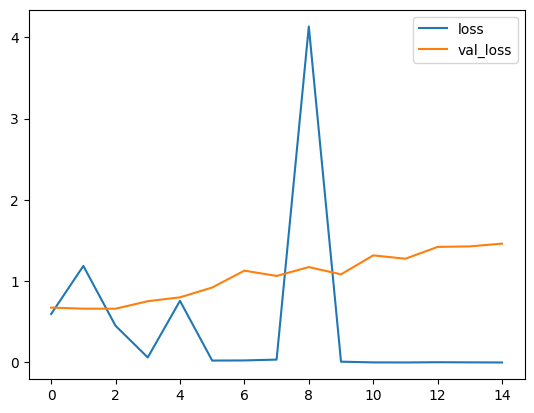

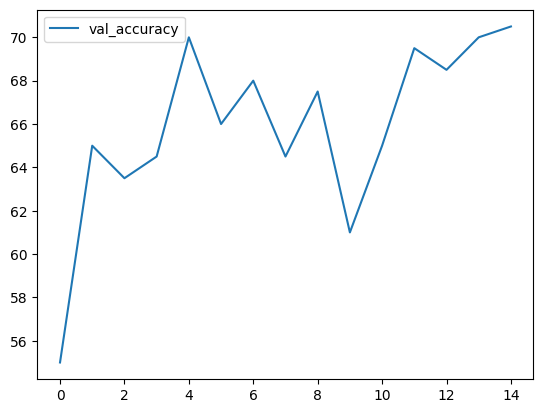

In [ ]:
# hagamos unos plot de cómo evoluciona el loss (training y val) y el accuracy (val)

import matplotlib.pyplot as plt
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get test data loss and accuracy

test_losses = [] # track loss
y_pred = []

model.eval()
# iterate over test data
for inputs, labels in test_loader:

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()

    # get predicted outputs
    output = model(inputs)

    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    y_pred.extend(pred.detach().numpy() if not train_on_gpu else pred.cpu().detach().numpy())

print("Test loss: {:.3f}".format(np.mean(test_losses)))

print("Summary of results:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test loss: 2.175
Summary of results:
              precision    recall  f1-score   support

           0       0.70      0.65      0.68      1000
           1       0.68      0.72      0.70      1000

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000

[[654 346]
 [281 719]]


In [ ]:
# leemos el dataframe de resultados de la práctica
df = pd.read_pickle("temp_results.p")

In [ ]:
# guardamos resultados para compararlos luego
dict_report = classification_report(y_test, y_pred, output_dict=True)
new_row = {'Model': "Random-embeddings-LSTM", 'macro avg precision': dict_report["macro avg"]["precision"], 'macro avg recall': dict_report["macro avg"]["recall"], 'macro avg f1-score': dict_report["macro avg"]["f1-score"]}

# append row to the dataframe
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

Como se puede observar, en la figura, el conjunto de validación había convergido prácticamente desde la cuarta epoch. Además, vemos como su loss no paraba de subir (lo cual es malo). Es probable que el learning rate esté demasiado alto, esto produce que la red no pueda aprender bien los detalles, ya que los parámetros que los procesan están siendo actualizados demasiado agresivamente.

En este caso hemos obtenido un avg macro F1 decente, pero lejos de otras propuestas de la práctica.

<br>
<p><mark>Actividad opcional: </mark></p>
<hr>

Intenta mejorar el rendimiento de la red jugando con el learning rate y el número de epochs.

**¿Te atreves a cambiar los embedding random por unos pre-entrenados?**

También se podría explorar el uso de más capas LSTM y la variante bidireccional.


Por último, vamos a ver una comparativa, en términos de medidas macro avg, de todos los clasificadores entrenados en la práctica.

In [ ]:
# vamos a ver la comparativa final de los clasificadores estudiados en esta práctica
# (puramente orientativo: podría variar mucho si se optimizan los parámetros de los modelos)

df

In [ ]:
t_fin = time()
t_total_min =int((t_fin - t_ini)/60)
print(f"Tiempo total de procesado: {t_total_min} minutos")

<br>
<p><mark>Conclusiones y comentarios finales: </mark></p>
<hr>

En esta práctica **hemos ido desde el NLP más básico con NLTK a los modelos de deep learning más complejos** como los transformers para generación de texto.
Como se puede observar en la tabla, el uso de features básicas y SVM sigue siendo una excelente alternativa, que se podría mejorar todavía más con otra extracción de características más compleja.

En cuanto a las aproximaciones de deep learning, **hemos visto el enorme potencial de los modelos pre-entrenados**, desde los embedding más clásicos de word2vec, hasta los últimos modelos de lenguaje neuronal. Estos últimos, además, han demostrado ser enormemente versátiles: clasificación, generación de texto, entailment para clasificación zero-shot... El futuro probablemente evolucionará en la línea de modelos cada vez más grandes y complejos, como **GPT-3**, entrenados con todavía más datos. Sin embargo, también habrá lugar para la innovación en términos de eficiencia. ¿Hacen falta realmente modelos tan grandes con tanta cantidad de datos? [(Bender et al., 2021)](https://dl.acm.org/doi/pdf/10.1145/3442188.3445922). Como ya hemos mencionado, el model distillation ofrece muy buenos resultados con arquitecturas mucho más pequeñas [(Hinton et al., 2015)](https://arxiv.org/pdf/1503.02531). Esto indica que pueden venir nuevos avances en la rama del aprendizaje, manteniendo en su sitio el mismo tipo de arquitecturas neuronales.

# **IDEAS CLAVE**
<br>
<hr>
<p> <h1> <center> <strong> Procesamiento del lenguaje natural con Deep Learning </center> </strong> </h1> </p>
<hr>
<br>

* **La extracción de árboles sintácticos es una tarea compleja.** Incluso entre expertos linguistas puede haber discrepancias entre el árbol óptimo, ya que una misma frase puede dar lugar a más de un árbol. NLTK requiere gramáticas que definan los patrones sintácticos para cada palabra y tipo, para poder inferir dichos árboles.

* **Los modelos de embeddings permiten representar información de un modo comprimido.** E.g. un modelo de embeddings de tamaño 50 permite representar un texto completo con un vector de 50 dimensiones, simplemente promediando sus palabras.

* **Los transformers son un tipo de modelo de lenguaje neuronal, basados en mecanismos de atención** [(Vaswani et al., 2017)](http://papers.nips.cc/paper/7181-attention-is-all-you-%0Aneed.pdf), que permiten generar representaciones continuas del texto completamente dependientes de su contexto.

* **Los embeddings de un transformer se pueden tunear dinámicamente** para cada instancia durante el entrenamiento del clasificador.

* **Hay que utilizar los modelos de la familia del transformer con cuidado**: son extremadamente pesados y lentos. No hace falta matar moscas a cañonazos.

* **Los modelos de embedding y transformer** ofrecen una característica muy ventajosa: el *transfer learning*, i.e., el modelo es pre-entrenado con un conocimiento general sobre el lenguaje, y luego se puede realizar un aprendizaje por transferencia de ese conocimiento pre-existente para una tarea específica. Esto **permite obtener modelos competitivos con necesidad de menos datos y tiempo de entrenamiento.**

* **Los transformers para zero-shot** han sido ajustados para tareas de *Natural Language Inference* (NLI) [(Yin et al., 2019)](https://arxiv.org/pdf/1909.00161) utilizando una combinación de varios dataset estado del arte en NLI. Estos dataset se utilizan para ajustar el transformer en tareas de vinculación o *entailment*. En este ámbito, **el objetivo es determinar si una premisa $P$ y una hipótesis $H$ están relacionadas.**

* Una **desventaja de los modelos zero-shot** con *entailment* es que se requiere una **evaluación independiente para cada clase**, lo cual hace que la complejidad del modelo escale linealmente con el número de clases.

* **No todas las tareas de clasificación zero-shot de texto van a funcionar igual de bien** o se van a poder modelar con la misma facilidad haciendo uso de hipótesis. Sin embargo, estos modelos ofrecen un buen punto de partida para tareas de recursos reducidos o inexistentes.

* **Las LSTM modificaron la arquitectura original de las RNN para mejorar la capacidad** de la red neuronal "de recordar" y así poder trabajar con secuencias de dependencias más largas, como las que pueda haber en un texto.  

* **El bloque de una LSTM tiene tres puertas (forget gate, input gate y output gate) que interactúan con la información que transporta el cell state a través de la red.** Esto permite regular el flujo de información y actualizar el gradiente de modo que las dependencias largas serán reconocidas mejor.